We are given an assignment of Car Price prediction. A Chinese car company wants to set their automobile business in Americal market and they want to understand the factors and their weight matters on price of a car. 

We'll start with understanding the Business problem and this is clear that they want the model to be there with the help of they can succeed in their business. 

So next we've to understand data and to clean it. Let's upload libraries first.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Now we'll upload libraries to use Regression. Why Regression because this is a regression problem as the output of model will be price based on the independent variable. Price is a continous value and thus regression.

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

As data is in dataFrame way so we'll call this data as df and after seeing the data, we'll try to understand what is dependent variable and which are independent variable.

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

To see all columns, we'll use the command below.

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

Now we can see all the columns so it is easy to infer our dependent variable is Price and there are few columns which seems from name that they'll have no dependency on price like Car_ID. We've to find more of such columns to reduce curve of dimensionality. But before doing that we'll check for missing values. Then we'll check for how imbalanced our data is if it is.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

     drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  \
0         False           False      False      False     False      False   
1         False           False      False      False     False      False   
2         False           False      False      False     False      False   
3         False           False      False      False     False      False   
4         False           False      False      False     False      False   
..          ...             ...        ...        ...       ...        ...   
200       False           False      False      False     False      False   
201       False           False      False      False     False      False   
202       False           False      False      False     False      False   
203       False           False      False      False     False      False   
204       False           False      False      False     False      False   

     curbweight  enginetype  cylindernumber  enginesize  fuelsystem  \
0         False       False           False       False       False   
1         False       False           False       False       False   
2         False       False           False       False       False   
3         False       False           False       False       False   
4         False       False           False       False       False   
..          ...         ...             ...         ...         ...   
200       False       False           False       False       False   
201       False       False           False       False       False   
202       False       False           False       False       False   
203       False       False           False       False       False   
204       False       False           False       False       False   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0        False   False             False       False    False    False   
1        False   False             False       False    False    False   
2        False   False             False       False    False    False   
3        False   False             False       False    False    False   
4        False   False             False       False    False    False   
..         ...     ...               ...         ...      ...      ...   
200      False   False             False       False    False    False   
201      False   False             False       False    False    False   
202      False   False             False       False    False    False   
203      False   False             False       False    False    False   
204      False   False             False       False    False    False   

     highwaympg  price  
0         False  False  
1         False  False  
2         False  False  
3         False  False  
4         False  False  
..          ...    ...  
200       False  False  
201       False  False  
202       False  False  
203       False  False  
204       False  False  

[205 rows x 26 columns]

It is clear that there are no null values.

In [9]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [10]:
ModifiedCarNames = df['CarName'].apply(lambda x: x.split(' ')[0])

In [11]:
ModifiedCarNames1 = ModifiedCarNames.apply(lambda x: x.split('-')[0])

In [12]:
ModifiedCarNames1

0       alfa
1       alfa
2       alfa
3       audi
4       audi
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: CarName, Length: 205, dtype: object

In [13]:
ModifiedCarNames1.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

From above list, we can see there are not proper standard of companies name. For example, Vokswagen, volkswagen and vw are same. So let's fix this in next step.

In [14]:
ModifiedCarNames1.count()

205

In [15]:
for i in range(ModifiedCarNames1.count()):
    if ModifiedCarNames1[i] == 'vw'or ModifiedCarNames1[i]=='vokswagen':
        ModifiedCarNames1[i]='volkswagen'
    

In [16]:
ModifiedCarNames1[:]

0       alfa
1       alfa
2       alfa
3       audi
4       audi
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: CarName, Length: 205, dtype: object

In [17]:
pd.set_option('display.max_rows', 205)

In [18]:
ModifiedCarNames1[:]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
50          maxda
51          maxda
52          mazda
53          mazda
54          mazda
55        

Next typo we can observe is toyouta instead of toyota

In [19]:
ModifiedCarNames1[181]='toyota'

In [20]:
ModifiedCarNames1[:]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
50          maxda
51          maxda
52          mazda
53          mazda
54          mazda
55        

In [21]:
ModifiedCarNames1[50] = 'mazda'

In [22]:
ModifiedCarNames1[51] = 'mazda'

In [23]:
ModifiedCarNames1[:]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
50          mazda
51          mazda
52          mazda
53          mazda
54          mazda
55        

In [24]:
ModifiedCarNames1[126] = 'porsche'

In [25]:
ModifiedCarNames1[:]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
50          mazda
51          mazda
52          mazda
53          mazda
54          mazda
55        

In [26]:
ModifiedCarNames2= ModifiedCarNames1.str.lower()

In [27]:
ModifiedCarNames2.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

Now CarNames is clear.

In [28]:
df['CarName']

0                   alfa-romero giulia
1                  alfa-romero stelvio
2             alfa-romero Quadrifoglio
3                          audi 100 ls
4                           audi 100ls
5                             audi fox
6                           audi 100ls
7                            audi 5000
8                            audi 4000
9                  audi 5000s (diesel)
10                            bmw 320i
11                            bmw 320i
12                              bmw x1
13                              bmw x3
14                              bmw z4
15                              bmw x4
16                              bmw x5
17                              bmw x3
18                    chevrolet impala
19               chevrolet monte carlo
20                 chevrolet vega 2300
21                       dodge rampage
22                 dodge challenger se
23                          dodge d200
24                   dodge monaco (sw)
25                  dodge

In [29]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [30]:
df['NewCarName']=ModifiedCarNames2

In [31]:
df.head(50)

car_ID  symboling                    CarName fueltype aspiration  \
0        1          3         alfa-romero giulia      gas        std   
1        2          3        alfa-romero stelvio      gas        std   
2        3          1   alfa-romero Quadrifoglio      gas        std   
3        4          2                audi 100 ls      gas        std   
4        5          2                 audi 100ls      gas        std   
5        6          2                   audi fox      gas        std   
6        7          1                 audi 100ls      gas        std   
7        8          1                  audi 5000      gas        std   
8        9          1                  audi 4000      gas      turbo   
9       10          0        audi 5000s (diesel)      gas      turbo   
10      11          2                   bmw 320i      gas        std   
11      12          0                   bmw 320i      gas        std   
12      13          0                     bmw x1      gas        std   
13      14          0                     bmw x3      gas        std   
14      15          1                     bmw z4      gas        std   
15      16          0                     bmw x4      gas        std   
16      17          0                     bmw x5      gas        std   
17      18          0                     bmw x3      gas        std   
18      19          2           chevrolet impala      gas        std   
19      20          1      chevrolet monte carlo      gas        std   
20      21          0        chevrolet vega 2300      gas        std   
21      22          1              dodge rampage      gas        std   
22      23          1        dodge challenger se      gas        std   
23      24          1                 dodge d200      gas      turbo   
24      25          1          dodge monaco (sw)      gas        std   
25      26          1         dodge colt hardtop      gas        std   
26      27          1            dodge colt (sw)      gas        std   
27      28          1       dodge coronet custom      gas      turbo   
28      29         -1          dodge dart custom      gas        std   
29      30          3  dodge coronet custom (sw)      gas      turbo   
30      31          2                honda civic      gas        std   
31      32          2           honda civic cvcc      gas        std   
32      33          1                honda civic      gas        std   
33      34          1          honda accord cvcc      gas        std   
34      35          1           honda civic cvcc      gas        std   
35      36          0            honda accord lx      gas        std   
36      37          0        honda civic 1500 gl      gas        std   
37      38          0               honda accord      gas        std   
38      39          0           honda civic 1300      gas        std   
39      40          0              honda prelude      gas        std   
40      41          0               honda accord      gas        std   
41      42          0                honda civic      gas        std   
42      43          1         honda civic (auto)      gas        std   
43      44          0                 isuzu MU-X      gas        std   
44      45          1               isuzu D-Max       gas        std   
45      46          0        isuzu D-Max V-Cross      gas        std   
46      47          2               isuzu D-Max       gas        std   
47      48          0                  jaguar xj      gas        std   
48      49          0                  jaguar xf      gas        std   
49      50          0                  jaguar xk      gas        std   

   doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0         two  convertible        rwd          front       88.6      168.8   
1         two  convertible        rwd          front       88.6      168.8   
2         two    hatchback        rwd          front       94.5      171.2   
3        four      

Deleting old CarName columns

In [32]:
del df['CarName']

In [33]:
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

  NewCarName  
0       alfa  
1       alfa  
2       alfa  
3       audi  
4       audi

In [34]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'NewCarName'],
      dtype='object')

In [35]:
DF=df.reindex(columns=['NewCarName','car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'])

In [36]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

Let's look at all the value count of car names

In [37]:
DF['NewCarName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa           3
renault        2
mercury        1
Name: NewCarName, dtype: int64

In [38]:
DF['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Above series shows that smallest is safe and largest value is risky

In [39]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewCarName        205 non-null    object 
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
DF['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [41]:
DF['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [42]:
DF['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [43]:
DF['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [44]:
DF['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64

In [45]:
DF['carlength'].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
165.3     6
177.8     6
176.2     6
186.6     6
172.0     5
176.8     5
175.6     5
173.2     5
169.0     4
198.9     4
168.9     4
172.4     4
168.7     4
170.7     3
192.7     3
159.1     3
155.9     3
150.0     3
169.7     3
175.4     3
158.7     3
167.3     2
173.0     2
183.5     2
187.8     2
173.5     2
184.6     2
173.4     2
170.2     2
180.2     2
173.6     2
168.8     2
189.0     2
190.9     2
144.6     2
174.6     2
199.6     2
166.8     2
175.0     2
167.5     2
202.6     2
176.6     2
177.3     1
178.2     1
159.3     1
157.1     1
165.7     1
193.8     1
197.0     1
141.1     1
158.8     1
183.1     1
163.4     1
171.2     1
156.9     1
157.9     1
178.4     1
169.1     1
181.5     1
175.7     1
172.6     1
191.7     1
178.5     1
181.7     1
162.4     1
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, dtype: int64

In [46]:
DF['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [47]:
DF['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [48]:
DF['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [49]:
DF['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [50]:
DF['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [51]:
DF['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

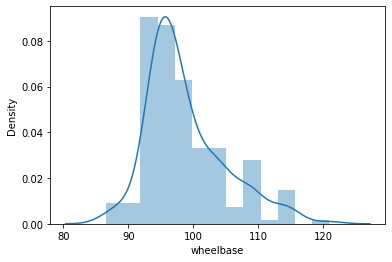

In [52]:
sns.distplot(DF['wheelbase'])

So far we are trying to understand the behaviour of data. Which type is more in the data and if it have to do with pricing. Let's find out.

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curbweight', ylabel='Density'>

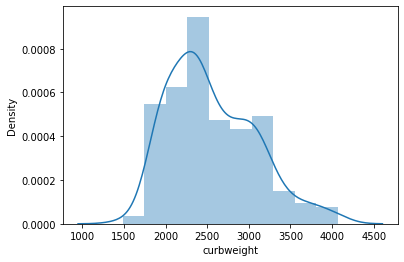

In [53]:
sns.distplot(DF['curbweight'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

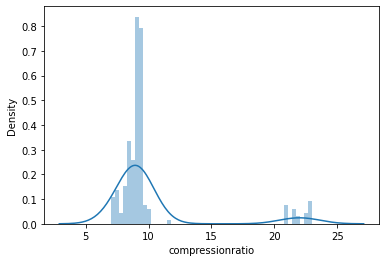

In [54]:
sns.distplot(DF['compressionratio'])

Now let's see target variable. It is the most important to understand

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

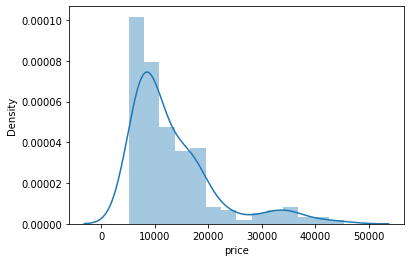

In [55]:
sns.distplot(DF['price'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

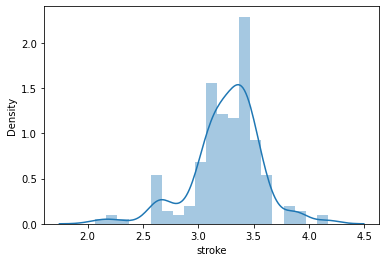

In [56]:
sns.distplot(DF['stroke'])

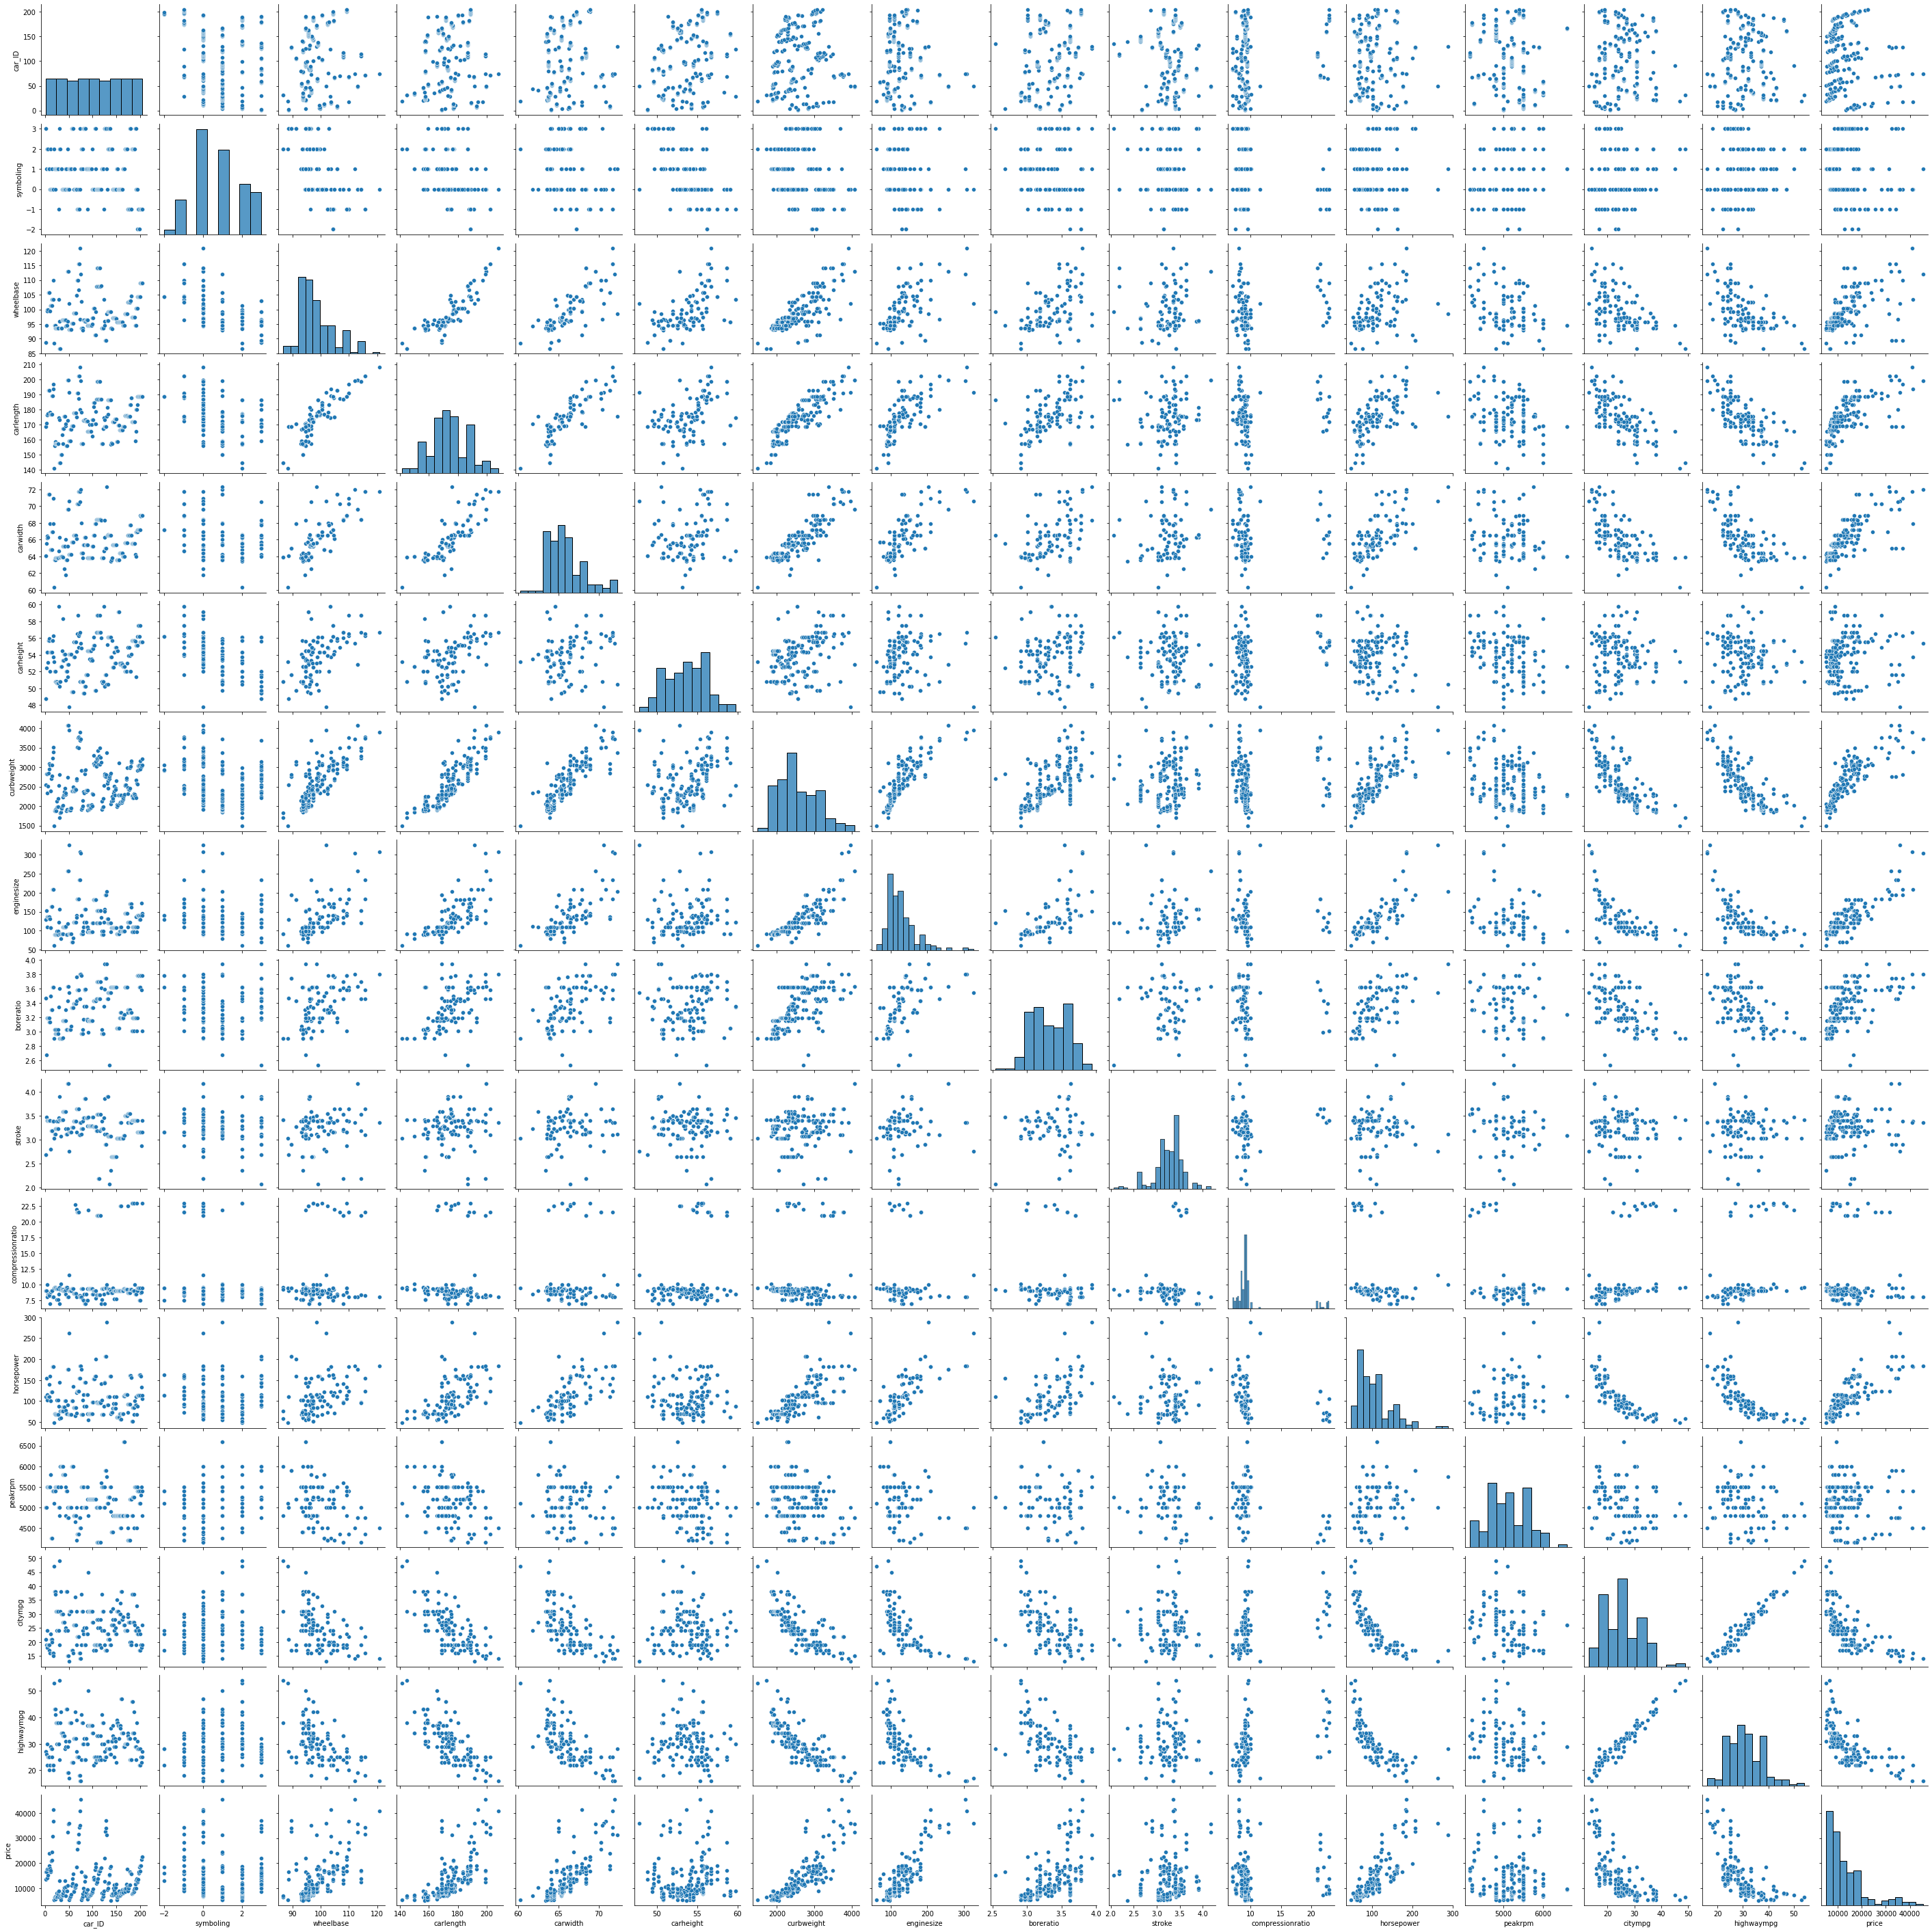

In [57]:
sns.pairplot(DF)

We're trying to observe from the pairplot above and seeing the last row and we can see there is some relation of price with Wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compression ratio, horsepower, citympg, highwympg

We'll try to check the same in terms of correlation through heatmap. But at the same time we have to consider causation in our head and do not entertain those variable with no causation and high correlation.

In [58]:
sns.heatmap(DF, cmap='Y1GnBu',annot=True)

ValueError: could not convert string to float: 'alfa'

We're seeing this error because we've not seperated out numeric with object. Either we have to make object as numeric or we've to make DF differently for numeric to check heatmap

Ideally, those object will not be able to get considered unless we don't change its type from object to numeric as model don't understand object. So in order to make that change, we have to understand whether that variable is nominal or ordinal.

Or we can do check heatmap of numeric directly without seperating out with this alternative as below.

In [59]:
corr=DF.corr()

In [60]:
corr

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

In [61]:
DF


NewCarName  car_ID  symboling fueltype aspiration doornumber  \
0          alfa       1          3      gas        std        two   
1          alfa       2          3      gas        std        two   
2          alfa       3          1      gas        std        two   
3          audi       4          2      gas        std       four   
4          audi       5          2      gas        std       four   
5          audi       6          2      gas        std        two   
6          audi       7          1      gas        std       four   
7          audi       8          1      gas        std       four   
8          audi       9          1      gas      turbo       four   
9          audi      10          0      gas      turbo        two   
10          bmw      11          2      gas        std        two   
11          bmw      12          0      gas        std       four   
12          bmw      13          0      gas        std        two   
13          bmw      14          0      gas        std       four   
14          bmw      15          1      gas        std       four   
15          bmw      16          0      gas        std       four   
16          bmw      17          0      gas        std        two   
17          bmw      18          0      gas        std       four   
18    chevrolet      19          2      gas        std        two   
19    chevrolet      20          1      gas        std        two   
20    chevrolet      21          0      gas        std       four   
21        dodge      22          1      gas        std        two   
22        dodge      23          1      gas        std        two   
23        dodge      24          1      gas      turbo        two   
24        dodge      25          1      gas        std       four   
25        dodge      26          1      gas        std       four   
26        dodge      27          1      gas        std       four   
27        dodge      28          1      gas      turbo        two   
28        dodge      29         -1      gas        std       four   
29        dodge      30          3      gas      turbo        two   
30        honda      31          2      gas        std        two   
31        honda      32          2      gas        std        two   
32        honda      33          1      gas        std        two   
33        honda      34          1      gas        std        two   
34        honda      35          1      gas        std        two   
35        honda      36          0      gas        std       four   
36        honda      37          0      gas        std       four   
37        honda      38          0      gas        std        two   
38        honda      39          0      gas        std        two   
39        honda      40          0      gas        std       four   
40        honda      41          0      gas        std       four   
41        honda      42          0      gas        std       four   
42        honda      43          1      gas        std        two   
43        isuzu      44          0      gas        std       four   
44        isuzu      45          1      gas        std        two   
45        isuzu      46          0      gas        std       four   
46        isuzu      47          2      gas        std        two   
47       jaguar      48          0      gas        std       four   
48       jaguar      49          0      gas        std       four   
49       jaguar      50          0      gas        std        two   
50        mazda      51          1      gas        std        two   
51        mazda      52          1      gas        std        two   
52        mazda      53          1      gas        std        two   
53        mazda      54          1      gas        std       four   
54        mazda      55          1      gas        std       four   
55        mazda      56          3      gas        std        two   
56        mazda      57          3      gas        std        two   
57 

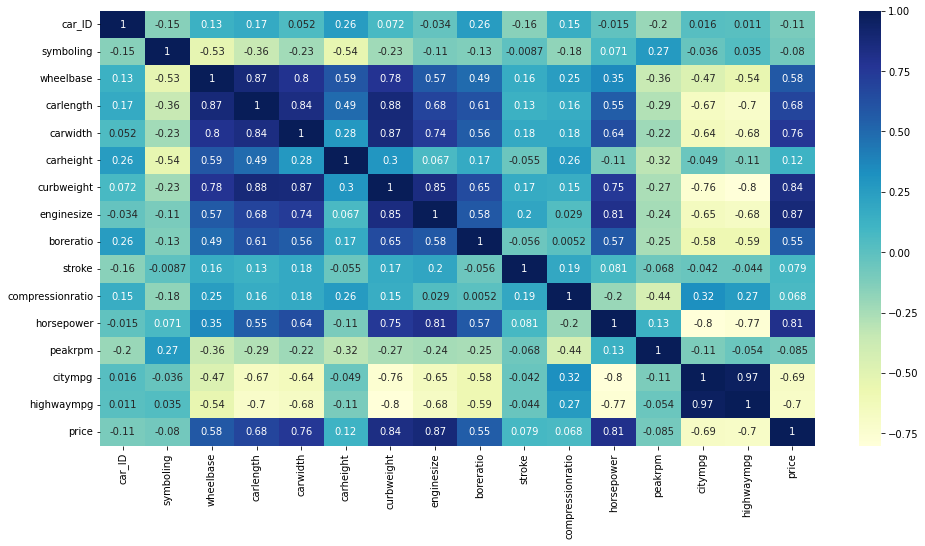

In [62]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap='YlGnBu',annot=True)
plt.show()

Carlenght, citympg, highwaympg shall get better if changed this variable with some equation. We'll try experimenting with its value and we'll come back again to correlation to check if it got better and if yes, then we'll change it.

In [120]:
DF['new'] = -1/DF['citympg']

In [121]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price       new  
0  13495.0 -0.047619  
1  16500.0 -0.047619  
2  16500.0 -0.052632  
3  13950.0 -0.041667  
4  17450.0 -0.055556

In [122]:
corr

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

In [123]:
corr1= DF.corr()

In [124]:
corr1

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   
new               0.092012  -0.063165  -0.474040  -0.659165 -0.682850   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   
new                0.002333   -0.791911   -0.744952  -0.555989 -0.042508   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   
new                       0.296964   -0.870797 -0.120597  0.950493   

                  highwaympg     price       new  
car_ID              0.01

In [125]:
DF.rename(columns = {'new':'inverse_citympg'},inplace=True)

In [126]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  inverse_citympg  
0  13495.0        -0.047619  
1  16500.0        -0.047619  
2  16500.0        -0.052632  
3  13950.0        -0.041667  
4  17450.0        -0.055556

In [127]:
DF['inverse_highwaympg'] = -1/DF['highwaympg']

In [128]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  inverse_citympg  inverse_highwaympg  
0  13495.0        -0.047619           -0.037037  
1  16500.0        -0.047619           -0.037037  
2  16500.0        -0.052632           -0.038462  
3  13950.0        -0.041667           -0.033333  
4  17450.0        -0.055556           -0.045455

In [129]:
corr2=DF.corr()

In [130]:
corr2

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID              1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling          -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase           0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength           0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth            0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight           0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight          0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize         -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio           0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke             -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio    0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower         -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm            -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg             0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg          0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price              -0.109093  -0.079978   0.577816   0.682920  0.759325   
inverse_citympg     0.092012  -0.063165  -0.474040  -0.659165 -0.682850   
inverse_highwaympg  0.072955   0.030190  -0.578128  -0.711597 -0.728044   

                    carheight  curbweight  enginesize  boreratio    stroke  \
car_ID               0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling           -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase            0.589435    0.776386    0.569329   0.488750  0.160959   
carlength            0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth             0.279210    0.867032    0.735433   0.559150  0.182942   
carheight            1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight           0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize           0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio            0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke              -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio     0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower          -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm             -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg             -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg          -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price                0.119336    0.835305    0.874145   0.553173  0.079443   
inverse_citympg      0.002333   -0.791911   -0.744952  -0.555989 -0.042508   
inverse_highwaympg  -0.085892   -0.836742   -0.777077  -0.551965 -0.055402   

                    compressionratio  horsepower   peakrpm   citympg  \
car_ID                      0.150276   -0.015006 -0.203789  0.015940   
symboling                  -0.178515    0.070873  0.273606 -0.035823   
wheelbase                   0.249786    0.353294 -0.360469 -0.470414   
carlength                   0.158414    0.552623 -0.287242 -0.670909   
carwidth                    0.181129    0.640732 -0.220012 -0.642704   
carheight                   0.261214   -0.108802 -0.320411 -0.048640   
curbweight                  0.151362    0.750739 -0.266243 -0.757414   
enginesize                  0.028971    0.809769 -0.244660 -0.653658   
boreratio                   0.005197    0.573677 -0.254976 -0.584532   
stroke                      0.186110    0.080940 -0.067964 -0.042145   
compressionratio            1.000000   -0.204326 -0.435741  0.324701   
horsepower                 -0.204326    1.000000  0.131073 -0.801456   
peakrpm                    -0.435741    0.131073  1.000000 -0.113544   
citympg                     0.324701   -0.801456 -0.113544  1.000000   
highwaympg                  0.265

In [131]:
DF['new_carlenght'] = DF['carlength']*DF['carlength']

In [132]:
corr3=DF.corr()

In [133]:
corr3

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID              1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling          -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase           0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength           0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth            0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight           0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight          0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize         -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio           0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke             -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio    0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower         -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm            -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg             0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg          0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price              -0.109093  -0.079978   0.577816   0.682920  0.759325   
inverse_citympg     0.092012  -0.063165  -0.474040  -0.659165 -0.682850   
inverse_highwaympg  0.072955   0.030190  -0.578128  -0.711597 -0.728044   
new_carlenght       0.157514  -0.362147   0.885765   0.998848  0.847355   

                    carheight  curbweight  enginesize  boreratio    stroke  \
car_ID               0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling           -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase            0.589435    0.776386    0.569329   0.488750  0.160959   
carlength            0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth             0.279210    0.867032    0.735433   0.559150  0.182942   
carheight            1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight           0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize           0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio            0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke              -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio     0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower          -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm             -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg             -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg          -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price                0.119336    0.835305    0.874145   0.553173  0.079443   
inverse_citympg      0.002333   -0.791911   -0.744952  -0.555989 -0.042508   
inverse_highwaympg  -0.085892   -0.836742   -0.777077  -0.551965 -0.055402   
new_carlenght        0.495144    0.881962    0.690686   0.600230  0.129580   

                    compressionratio  horsepower   peakrpm   citympg  \
car_ID                      0.150276   -0.015006 -0.203789  0.015940   
symboling                  -0.178515    0.070873  0.273606 -0.035823   
wheelbase                   0.249786    0.353294 -0.360469 -0.470414   
carlength                   0.158414    0.552623 -0.287242 -0.670909   
carwidth                    0.181129    0.640732 -0.220012 -0.642704   
carheight                   0.261214   -0.108802 -0.320411 -0.048640   
curbweight                  0.151362    0.750739 -0.266243 -0.757414   
enginesize                  0.028971    0.809769 -0.244660 -0.653658   
boreratio                   0.005197    0.573677 -0.254976 -0.584532   
stroke                      0.186110    0.080940 -0.067964 -0.042145   
compressionratio            1.000000   -0.204326 -0.435741  0.324701   
horsepower                 -0.204326    1.000000  0.131073 -0.801456   
peakrpm                 

Since we can notice that we increased correlation by 0.1 of citympg and highwaympg but not of carlenght so we'll delete the exerimental column of carlength.

In [134]:
del DF['new_carlenght']

In [135]:
df1=DF.copy(deep=False)

In [136]:
del df1['citympg']

In [137]:
del df1['highwaympg']

In [138]:
df1.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm    price  inverse_citympg  \
0    2.68               9.0         111     5000  13495.0        -0.047619   
1    2.68               9.0         111     5000  16500.0        -0.047619   
2    3.47               9.0         154     5000  16500.0        -0.052632   
3    3.40              10.0         102     5500  13950.0        -0.041667   
4    3.40               8.0         115     5500  17450.0        -0.055556   

   inverse_highwaympg  
0           -0.037037  
1           -0.037037  
2           -0.038462  
3           -0.033333  
4           -0.045455

In [139]:
df1.columns


Index(['NewCarName', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'inverse_citympg',
       'inverse_highwaympg'],
      dtype='object')

In [140]:
df1=df1.reindex(columns=['new_car_name', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'price'])

In [141]:
df1.head()

new_car_name  car_ID  symboling fueltype aspiration doornumber  \
0           NaN       1          3      gas        std        two   
1           NaN       2          3      gas        std        two   
2           NaN       3          1      gas        std        two   
3           NaN       4          2      gas        std       four   
4           NaN       5          2      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  inverse_citympg  \
0       3.47    2.68               9.0         111     5000        -0.047619   
1       3.47    2.68               9.0         111     5000        -0.047619   
2       2.68    3.47               9.0         154     5000        -0.052632   
3       3.19    3.40              10.0         102     5500        -0.041667   
4       3.19    3.40               8.0         115     5500        -0.055556   

   inverse_highwaympg    price  
0           -0.037037  13495.0  
1           -0.037037  16500.0  
2           -0.038462  16500.0  
3           -0.033333  13950.0  
4           -0.045455  17450.0

In [142]:
corr4 = df1.corr()
corr4

new_car_name    car_ID  symboling  wheelbase  carlength  \
new_car_name                 NaN       NaN        NaN        NaN        NaN   
car_ID                       NaN  1.000000  -0.151621   0.129729   0.170636   
symboling                    NaN -0.151621   1.000000  -0.531954  -0.357612   
wheelbase                    NaN  0.129729  -0.531954   1.000000   0.874587   
carlength                    NaN  0.170636  -0.357612   0.874587   1.000000   
carwidth                     NaN  0.052387  -0.232919   0.795144   0.841118   
carheight                    NaN  0.255960  -0.541038   0.589435   0.491029   
curbweight                   NaN  0.071962  -0.227691   0.776386   0.877728   
enginesize                   NaN -0.033930  -0.105790   0.569329   0.683360   
boreratio                    NaN  0.260064  -0.130051   0.488750   0.606454   
stroke                       NaN -0.160824  -0.008735   0.160959   0.129533   
compressionratio             NaN  0.150276  -0.178515   0.249786   0.158414   
horsepower                   NaN -0.015006   0.070873   0.353294   0.552623   
peakrpm                      NaN -0.203789   0.273606  -0.360469  -0.287242   
inverse_citympg              NaN  0.092012  -0.063165  -0.474040  -0.659165   
inverse_highwaympg           NaN  0.072955   0.030190  -0.578128  -0.711597   
price                        NaN -0.109093  -0.079978   0.577816   0.682920   

                    carwidth  carheight  curbweight  enginesize  boreratio  \
new_car_name             NaN        NaN         NaN         NaN        NaN   
car_ID              0.052387   0.255960    0.071962   -0.033930   0.260064   
symboling          -0.232919  -0.541038   -0.227691   -0.105790  -0.130051   
wheelbase           0.795144   0.589435    0.776386    0.569329   0.488750   
carlength           0.841118   0.491029    0.877728    0.683360   0.606454   
carwidth            1.000000   0.279210    0.867032    0.735433   0.559150   
carheight           0.279210   1.000000    0.295572    0.067149   0.171071   
curbweight          0.867032   0.295572    1.000000    0.850594   0.648480   
enginesize          0.735433   0.067149    0.850594    1.000000   0.583774   
boreratio           0.559150   0.171071    0.648480    0.583774   1.000000   
stroke              0.182942  -0.055307    0.168790    0.203129  -0.055909   
compressionratio    0.181129   0.261214    0.151362    0.028971   0.005197   
horsepower          0.640732  -0.108802    0.750739    0.809769   0.573677   
peakrpm            -0.220012  -0.320411   -0.266243   -0.244660  -0.254976   
inverse_citympg    -0.682850   0.002333   -0.791911   -0.744952  -0.555989   
inverse_highwaympg -0.728044  -0.085892   -0.836742   -0.777077  -0.551965   
price               0.759325   0.119336    0.835305    0.874145   0.553173   

                      stroke  compressionratio  horsepower   peakrpm  \
new_car_name             NaN               NaN         NaN       NaN   
car_ID             -0.160824          0.150276   -0.015006 -0.203789   
symboling          -0.008735         -0.178515    0.070873  0.273606   
wheelbase           0.160959          0.249786    0.353294 -0.360469   
carlength           0.129533          0.158414    0.552623 -0.287242   
carwidth            0.182942          0.181129    0.640732 -0.220012   
carheight          -0.055307          0.261214   -0.108802 -0.320411   
curbweight          0.168790          0.151362    0.750739 -0.266243   
enginesize          0.203129          0.028971    0.809769 -0.244660   
boreratio          -0.055909          0.005197    0.573677 -0.254976   
stroke              1.000000          0.186110    0.080940 -0.067964   
compressionratio    0.186110          1.000000   -0.204326 -0.435741   
horsepower          0.080940         -0.204326    1.000000  0.131073   
peakrpm            -0.067964         -0.435741    0.131073  1.000000   
inverse_citympg    -0.042508          0.296964   -0.870797 -0.120597   
inverse_highwaympg -0.055402          0.

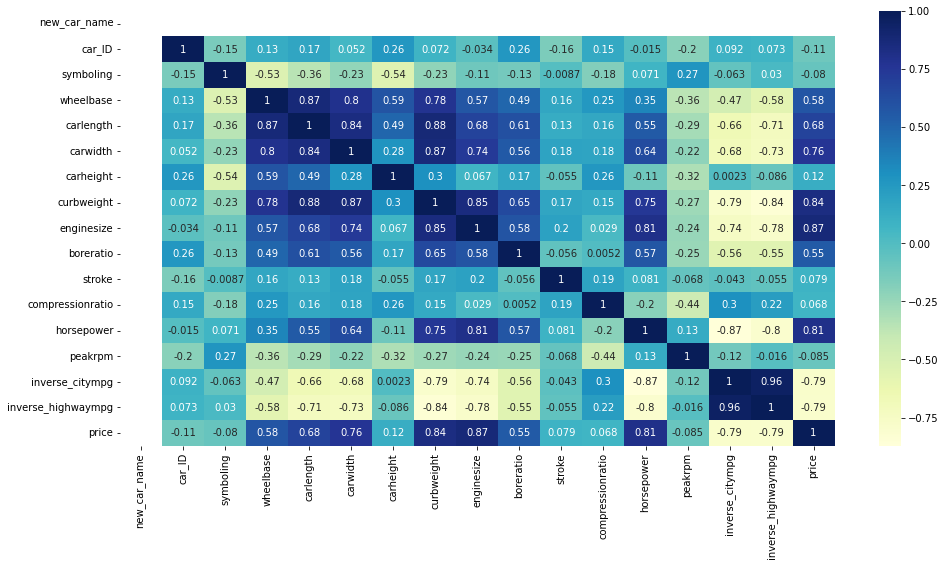

In [143]:
plt.figure(figsize=(16,8))
sns.heatmap(corr4,cmap='YlGnBu',annot=True)
plt.show()

Now we've two dataframes ready, one experiment with modified columns and other as it is.

In [226]:
df1.head()

ncar_name  car_ID  symboling fueltype aspiration doornumber      carbody  \
0      alfa       1          3      gas        std        two  convertible   
1      alfa       2          3      gas        std        two  convertible   
2      alfa       3          1      gas        std        two    hatchback   
3      audi       4          2      gas        std       four        sedan   
4      audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  inverse_citympg  \
0    2.68               9.0         111     5000        -0.047619   
1    2.68               9.0         111     5000        -0.047619   
2    3.47               9.0         154     5000        -0.052632   
3    3.40              10.0         102     5500        -0.041667   
4    3.40               8.0         115     5500        -0.055556   

   inverse_highwaympg    price  
0           -0.037037  13495.0  
1           -0.037037  16500.0  
2           -0.038462  16500.0  
3           -0.033333  13950.0  
4           -0.045455  17450.0

In [227]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

We can see that in df1, we did wrong by editing carname where we should have used that syntax for ordering and secondly, we have to delete extra columns from DF

In [228]:
del DF['inverse_citympg']

KeyError: 'inverse_citympg'

In [ ]:
del DF['inverse_highwaympg']

In [229]:
DF.head()

NewCarName  car_ID  symboling fueltype aspiration doornumber      carbody  \
0       alfa       1          3      gas        std        two  convertible   
1       alfa       2          3      gas        std        two  convertible   
2       alfa       3          1      gas        std        two    hatchback   
3       audi       4          2      gas        std       four        sedan   
4       audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [230]:
df1['ncar_name'] = DF['NewCarName']

In [231]:
df1.head()

ncar_name  car_ID  symboling fueltype aspiration doornumber      carbody  \
0      alfa       1          3      gas        std        two  convertible   
1      alfa       2          3      gas        std        two  convertible   
2      alfa       3          1      gas        std        two    hatchback   
3      audi       4          2      gas        std       four        sedan   
4      audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  inverse_citympg  \
0    2.68               9.0         111     5000        -0.047619   
1    2.68               9.0         111     5000        -0.047619   
2    3.47               9.0         154     5000        -0.052632   
3    3.40              10.0         102     5500        -0.041667   
4    3.40               8.0         115     5500        -0.055556   

   inverse_highwaympg    price  
0           -0.037037  13495.0  
1           -0.037037  16500.0  
2           -0.038462  16500.0  
3           -0.033333  13950.0  
4           -0.045455  17450.0

In [232]:
df1=df1.reindex(columns=['ncar_name', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'price'])

In [233]:
df1.head()

ncar_name  car_ID  symboling fueltype aspiration doornumber      carbody  \
0      alfa       1          3      gas        std        two  convertible   
1      alfa       2          3      gas        std        two  convertible   
2      alfa       3          1      gas        std        two    hatchback   
3      audi       4          2      gas        std       four        sedan   
4      audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  inverse_citympg  \
0    2.68               9.0         111     5000        -0.047619   
1    2.68               9.0         111     5000        -0.047619   
2    3.47               9.0         154     5000        -0.052632   
3    3.40              10.0         102     5500        -0.041667   
4    3.40               8.0         115     5500        -0.055556   

   inverse_highwaympg    price  
0           -0.037037  13495.0  
1           -0.037037  16500.0  
2           -0.038462  16500.0  
3           -0.033333  13950.0  
4           -0.045455  17450.0

Two things we've to do before starting the model. First - change data type of categorical to numerical and second - standardizing the values in order to make it easy for the model. After that only we shall do spliting and training model.

One more important thing is that as we can see in heatmap or correlation table that some of independent features have high correlation with each other. It will be there in the most cases but it is not good to have multi colinearity in the model. We should calculate the VIF remove those variables having the high VIF. 

### Data Preparation

Let's split the target variable from independent variables.

We'll split the same for both DF and df1 by naming them x, y and X, Y

In [234]:
df1.columns

Index(['ncar_name', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'price'],
      dtype='object')

In [235]:
x=df1.loc[:,['ncar_name', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg']]

In [236]:
y=df1.loc[:,['price']]

In [237]:
x.head()

ncar_name  car_ID  symboling fueltype aspiration doornumber      carbody  \
0      alfa       1          3      gas        std        two  convertible   
1      alfa       2          3      gas        std        two  convertible   
2      alfa       3          1      gas        std        two    hatchback   
3      audi       4          2      gas        std       four        sedan   
4      audi       5          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  inverse_citympg  \
0    2.68               9.0         111     5000        -0.047619   
1    2.68               9.0         111     5000        -0.047619   
2    3.47               9.0         154     5000        -0.052632   
3    3.40              10.0         102     5500        -0.041667   
4    3.40               8.0         115     5500        -0.055556   

   inverse_highwaympg  
0           -0.037037  
1           -0.037037  
2           -0.038462  
3           -0.033333  
4           -0.045455

In [238]:
y.head()

price
0  13495.0
1  16500.0
2  16500.0
3  13950.0
4  17450.0

In [239]:
DF.columns

Index(['NewCarName', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [240]:
X=DF.loc[:,['NewCarName', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [241]:
Y=DF.loc[:,['price']]

In [242]:
x_cate = x.select_dtypes(include = 'object')

In [243]:
x_cate.head()

ncar_name fueltype aspiration doornumber      carbody drivewheel  \
0      alfa      gas        std        two  convertible        rwd   
1      alfa      gas        std        two  convertible        rwd   
2      alfa      gas        std        two    hatchback        rwd   
3      audi      gas        std       four        sedan        fwd   
4      audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

In [244]:
X_cate = X.select_dtypes(include = 'object')

In [245]:
X_cate.head()

NewCarName fueltype aspiration doornumber      carbody drivewheel  \
0       alfa      gas        std        two  convertible        rwd   
1       alfa      gas        std        two  convertible        rwd   
2       alfa      gas        std        two    hatchback        rwd   
3       audi      gas        std       four        sedan        fwd   
4       audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

Since x_cate and X_cate are totally same so we can do further processing on x_cate only and use it for both.

Now we'll create dummies for these variables. I know curse of dimentionality but what to do as there is no ordinal columns. 

In [246]:
x_cate_dummies = pd.get_dummies(x_cate, drop_first=True)

In [247]:
x_cate_dummies.head()

ncar_name_audi  ncar_name_bmw  ncar_name_buick  ncar_name_chevrolet  \
0               0              0                0                    0   
1               0              0                0                    0   
2               0              0                0                    0   
3               1              0                0                    0   
4               1              0                0                    0   

   ncar_name_dodge  ncar_name_honda  ncar_name_isuzu  ncar_name_jaguar  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   ncar_name_mazda  ncar_name_mercury  ncar_name_mitsubishi  ncar_name_nissan  \
0                0                  0                     0                 0   
1                0                  0                     0                 0   
2                0                  0                     0                 0   
3                0                  0                     0                 0   
4                0                  0                     0                 0   

   ncar_name_peugeot  ncar_name_plymouth  ncar_name_porsche  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   ncar_name_renault  ncar_name_saab  ncar_name_subaru  ncar_name_toyota  \
0                  0               0                 0                 0   
1                  0               0                 0                 0   
2                  0               0                 0                 0   
3                  0               0                 0                 0   
4                  0               0                 0                 0   

   ncar_name_volkswagen  ncar_name_volvo  fueltype_gas  aspiration_turbo  \
0                     0                0             1                 0   
1                     0                0             1                 0   
2                     0                0             1                 0   
3                     0                0             1                 0   
4                     0                0             1                 0   

   doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0               1                0                  0              0   
1               1                0                  0              0   
2               1                0                  1              0   
3               0                0                  0              1   
4               0                0                  0              1   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginelocation_rear  \
0              0               0               1                    0   
1              0               0               1                    0   
2              0               0               1                    0   
3              0               1               0                    0   
4              0               0               0                    0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0                 0             0               0                0   
1                 0             0               0                0   
2                 0             0               0                0   
3                 0             0               1                0   
4                 0             0               1                0   

   enginetype_ohcv  enginetype_rotor  cy

We'll have to delete categorical data and append this data as above.

In [248]:
x=x.drop(list(x_cate.columns),axis=1)

In [249]:
x.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   inverse_citympg  inverse_highwaympg  
0        -0.047619           -0.037037  
1        -0.047619           -0.037037  
2        -0.052632           -0.038462  
3        -0.041667           -0.033333  
4        -0.055556           -0.045455

In [250]:
X=X.drop(list(X_cate.columns),axis=1)

In [251]:
X.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg  
0       21          27  
1       21          27  
2       19          26  
3       24          30  
4       18          22

In [252]:
X=pd.concat([X,x_cate_dummies],axis=1)

In [253]:
X.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg  ncar_name_audi  ncar_name_bmw  ncar_name_buick  \
0       21          27               0              0                0   
1       21          27               0              0                0   
2       19          26               0              0                0   
3       24          30               1              0                0   
4       18          22               1              0                0   

   ncar_name_chevrolet  ncar_name_dodge  ncar_name_honda  ncar_name_isuzu  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   ncar_name_jaguar  ncar_name_mazda  ncar_name_mercury  ncar_name_mitsubishi  \
0                 0                0                  0                     0   
1                 0                0                  0                     0   
2                 0                0                  0                     0   
3                 0                0                  0                     0   
4                 0                0                  0                     0   

   ncar_name_nissan  ncar_name_peugeot  ncar_name_plymouth  ncar_name_porsche  \
0                 0                  0                   0                  0   
1                 0                  0                   0                  0   
2                 0                  0                   0                  0   
3                 0                  0                   0                  0   
4                 0                  0                   0                  0   

   ncar_name_renault  ncar_name_saab  ncar_name_subaru  ncar_name_toyota  \
0                  0               0                 0                 0   
1                  0               0                 0                 0   
2                  0               0                 0                 0   
3                  0               0                 0                 0   
4                  0               0                 0                 0   

   ncar_name_volkswagen  ncar_name_volvo  fueltype_gas  aspiration_turbo  \
0                     0                0             1                 0   
1                     0                0             1                 0   
2                     0                0             1                 0   
3                     0                0             1                 0   
4                     0                0             1                 0   

   doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0               1                0                  0              0   
1               1                0                  0              0   
2               1                0                  1            

In [254]:
x=pd.concat([x,x_cate_dummies],axis=1)

In [255]:
x.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   inverse_citympg  inverse_highwaympg  ncar_name_audi  ncar_name_bmw  \
0        -0.047619           -0.037037               0              0   
1        -0.047619           -0.037037               0              0   
2        -0.052632           -0.038462               0              0   
3        -0.041667           -0.033333               1              0   
4        -0.055556           -0.045455               1              0   

   ncar_name_buick  ncar_name_chevrolet  ncar_name_dodge  ncar_name_honda  \
0                0                    0                0                0   
1                0                    0                0                0   
2                0                    0                0                0   
3                0                    0                0                0   
4                0                    0                0                0   

   ncar_name_isuzu  ncar_name_jaguar  ncar_name_mazda  ncar_name_mercury  \
0                0                 0                0                  0   
1                0                 0                0                  0   
2                0                 0                0                  0   
3                0                 0                0                  0   
4                0                 0                0                  0   

   ncar_name_mitsubishi  ncar_name_nissan  ncar_name_peugeot  \
0                     0                 0                  0   
1                     0                 0                  0   
2                     0                 0                  0   
3                     0                 0                  0   
4                     0                 0                  0   

   ncar_name_plymouth  ncar_name_porsche  ncar_name_renault  ncar_name_saab  \
0                   0                  0                  0               0   
1                   0                  0                  0               0   
2                   0                  0                  0               0   
3                   0                  0                  0               0   
4                   0                  0                  0               0   

   ncar_name_subaru  ncar_name_toyota  ncar_name_volkswagen  ncar_name_volvo  \
0                 0                 0                     0                0   
1                 0                 0                     0                0   
2                 0                 0                     0                0   
3                 0                 0                     0                0   
4                 0                 0                     0                0   

   fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0             1                 0               1                0   
1             1                 0               1                0   
2             1                 0               1                0   
3             1                 0               0                0   
4             1            

Let's check multicollinearity, to calculated VIF we can use the loop

In [258]:
Default_indep=X

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x1=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y1=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y1,x1)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of symboling is 0.8562662930203224
VIF for symboling is 6.96
R-Sqr value of wheelbase is 0.9526892216783546
VIF for wheelbase is 21.14
R-Sqr value of carlength is 0.9597604646044299
VIF for carlength is 24.85
R-Sqr value of carwidth is 0.9385174160622594
VIF for carwidth is 16.26
R-Sqr value of carheight is 0.8873253493198351
VIF for carheight is 8.88
R-Sqr value of curbweight is 0.9804166849111217
VIF for curbweight is 51.06
R-Sqr value of enginesize is 0.9866518366668016
VIF for enginesize is 74.92
R-Sqr value of boreratio is 0.9406888225710581
VIF for boreratio is 16.86
R-Sqr value of stroke is 0.8522436017243078
VIF for stroke is 6.77
R-Sqr value of compressionratio is 0.996039429597356
VIF for compressionratio is 252.49
R-Sqr value of horsepower is 0.9833136617407136
VIF for horsepower is 59.93
R-Sqr value of peakrpm is 0.8468379289554897
VIF for peakrpm is 6.53
R-Sqr value of citympg is 0.9806926947421575
VIF for citympg is 51.79
R-Sqr value of highwaympg is 0.9758735

C:\Users\Rachit Pahwa\AppData\Local\Temp\ipykernel_2536\1997134997.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


R-Sqr value of ncar_name_plymouth is 0.9918626019013911
VIF for ncar_name_plymouth is 122.89
R-Sqr value of ncar_name_porsche is 0.9893518824007032
VIF for ncar_name_porsche is 93.91
R-Sqr value of ncar_name_renault is 0.973823310959533
VIF for ncar_name_renault is 38.2
R-Sqr value of ncar_name_saab is 0.9920127843093273
VIF for ncar_name_saab is 125.2
R-Sqr value of ncar_name_subaru is 1.0
VIF for ncar_name_subaru is inf
R-Sqr value of ncar_name_toyota is 0.9987574843381843
VIF for ncar_name_toyota is 804.82
R-Sqr value of ncar_name_volkswagen is 0.997743570215541
VIF for ncar_name_volkswagen is 443.18
R-Sqr value of ncar_name_volvo is 0.9976211675701803
VIF for ncar_name_volvo is 420.37
R-Sqr value of fueltype_gas is 0.9999265088300002
VIF for fueltype_gas is 13607.08
R-Sqr value of aspiration_turbo is 0.8493134890613827
VIF for aspiration_turbo is 6.64
R-Sqr value of doornumber_two is 0.7442326567235054
VIF for doornumber_two is 3.91
R-Sqr value of carbody_hardtop is 0.7254092860725

In [259]:
default_indep=x

import statsmodels.api as sm
features=list(default_indep.columns)
for i in range(1, len(default_indep.columns)):
    x2=Default_indep.loc[:,default_indep.columns!=features[i]]
    y2=Default_indep.loc[:,default_indep.columns==features[i]]
    model=sm.OLS(y2,x2)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of symboling is 0.8562662930203224
VIF for symboling is 6.96
R-Sqr value of wheelbase is 0.9526892216783546
VIF for wheelbase is 21.14
R-Sqr value of carlength is 0.9597604646044299
VIF for carlength is 24.85
R-Sqr value of carwidth is 0.9385174160622594
VIF for carwidth is 16.26
R-Sqr value of carheight is 0.8873253493198351
VIF for carheight is 8.88
R-Sqr value of curbweight is 0.9804166849111217
VIF for curbweight is 51.06
R-Sqr value of enginesize is 0.9866518366668016
VIF for enginesize is 74.92
R-Sqr value of boreratio is 0.9406888225710581
VIF for boreratio is 16.86
R-Sqr value of stroke is 0.8522436017243078
VIF for stroke is 6.77
R-Sqr value of compressionratio is 0.996039429597356
VIF for compressionratio is 252.49
R-Sqr value of horsepower is 0.9833136617407136
VIF for horsepower is 59.93
R-Sqr value of peakrpm is 0.8468379289554897
VIF for peakrpm is 6.53
R-Sqr value of inverse_citympg is 0.9806926947421575
VIF for inverse_citympg is 51.79
R-Sqr value of inverse

C:\Users\Rachit Pahwa\AppData\Local\Temp\ipykernel_2536\4237884885.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


R-Sqr value of ncar_name_plymouth is 0.9918626019013911
VIF for ncar_name_plymouth is 122.89
R-Sqr value of ncar_name_porsche is 0.9893518824007032
VIF for ncar_name_porsche is 93.91
R-Sqr value of ncar_name_renault is 0.973823310959533
VIF for ncar_name_renault is 38.2
R-Sqr value of ncar_name_saab is 0.9920127843093273
VIF for ncar_name_saab is 125.2
R-Sqr value of ncar_name_subaru is 1.0
VIF for ncar_name_subaru is inf
R-Sqr value of ncar_name_toyota is 0.9987574843381843
VIF for ncar_name_toyota is 804.82
R-Sqr value of ncar_name_volkswagen is 0.997743570215541
VIF for ncar_name_volkswagen is 443.18
R-Sqr value of ncar_name_volvo is 0.9976211675701803
VIF for ncar_name_volvo is 420.37
R-Sqr value of fueltype_gas is 0.9999265088300002
VIF for fueltype_gas is 13607.08
R-Sqr value of aspiration_turbo is 0.8493134890613827
VIF for aspiration_turbo is 6.64
R-Sqr value of doornumber_two is 0.7442326567235054
VIF for doornumber_two is 3.91
R-Sqr value of carbody_hardtop is 0.7254092860725

scaling the features

storing column names in cols, since column names are (annoyingly) lost after  scaling (the df is converted to a numpy array)

In [260]:
from sklearn.preprocessing import scale

Cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = Cols
X.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'ncar_name_audi', 'ncar_name_bmw', 'ncar_name_buick',
       'ncar_name_chevrolet', 'ncar_name_dodge', 'ncar_name_honda',
       'ncar_name_isuzu', 'ncar_name_jaguar', 'ncar_name_mazda',
       'ncar_name_mercury', 'ncar_name_mitsubishi', 'ncar_name_nissan',
       'ncar_name_peugeot', 'ncar_name_plymouth', 'ncar_name_porsche',
       'ncar_name_renault', 'ncar_name_saab', 'ncar_name_subaru',
       'ncar_name_toyota', 'ncar_name_volkswagen', 'ncar_name_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
    

In [261]:
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'ncar_name_audi', 'ncar_name_bmw',
       'ncar_name_buick', 'ncar_name_chevrolet', 'ncar_name_dodge',
       'ncar_name_honda', 'ncar_name_isuzu', 'ncar_name_jaguar',
       'ncar_name_mazda', 'ncar_name_mercury', 'ncar_name_mitsubishi',
       'ncar_name_nissan', 'ncar_name_peugeot', 'ncar_name_plymouth',
       'ncar_name_porsche', 'ncar_name_renault', 'ncar_name_saab',
       'ncar_name_subaru', 'ncar_name_toyota', 'ncar_name_volkswagen',
       'ncar_name_volvo', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 

In [262]:
Cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'ncar_name_audi', 'ncar_name_bmw', 'ncar_name_buick',
       'ncar_name_chevrolet', 'ncar_name_dodge', 'ncar_name_honda',
       'ncar_name_isuzu', 'ncar_name_jaguar', 'ncar_name_mazda',
       'ncar_name_mercury', 'ncar_name_mitsubishi', 'ncar_name_nissan',
       'ncar_name_peugeot', 'ncar_name_plymouth', 'ncar_name_porsche',
       'ncar_name_renault', 'ncar_name_saab', 'ncar_name_subaru',
       'ncar_name_toyota', 'ncar_name_volkswagen', 'ncar_name_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
    

In [263]:
cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'ncar_name_audi', 'ncar_name_bmw',
       'ncar_name_buick', 'ncar_name_chevrolet', 'ncar_name_dodge',
       'ncar_name_honda', 'ncar_name_isuzu', 'ncar_name_jaguar',
       'ncar_name_mazda', 'ncar_name_mercury', 'ncar_name_mitsubishi',
       'ncar_name_nissan', 'ncar_name_peugeot', 'ncar_name_plymouth',
       'ncar_name_porsche', 'ncar_name_renault', 'ncar_name_saab',
       'ncar_name_subaru', 'ncar_name_toyota', 'ncar_name_volkswagen',
       'ncar_name_volvo', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 

creating a linear model by splitting the data 

In [264]:
print(X), print(y)
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25, random_state=1)

       car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0   -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   
1   -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   
2   -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527   
3   -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   
4   -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942   
5   -1.639131   0.938490   0.173698   0.264133  0.183272  -0.256354   
6   -1.622233   0.133509   1.172521   1.515437  2.566488   0.810288   
7   -1.605334   0.133509   1.172521   1.515437  2.566488   0.810288   
8   -1.588436   0.133509   1.172521   1.515437  2.566488   0.892338   
9   -1.571538  -0.671472   0.123757   0.337262  0.930947  -0.707626   
10  -1.554640   0.938490   0.406756   0.223507 -0.517674   0.235942   
11  -1.537741  -0.671472   0.406756   0.223507 -0.517674   0.235942   
12  -1.520843  -0.671472   0.406756   0.223507 -0.517674   0.235942   
13  -1

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=1)

Building Model and Evaluation

In [282]:
# fitting a linear model
# from sklearn.linear_model import LinearRegression as lm
# lm.fit(x_train,y_train)
# for i in range (len(x_train.columns)):
#     print("the coeff of {} variable is {}".format(x_train.columns[i],lm.coef_[i]))
#     print("the coeff of {} variable is {}".format('intercept',lm.intercept_[0]))
    
# model.coef_[1]
# print(lm.coef_)

In [267]:
lm = LinearRegression()

lm.fit(x_train,y_train)

print(lm.coef_)

print(lm.intercept_)

[[ 1.92217347e+03 -1.61167670e+01  1.43708676e+03 -2.82801573e+03
   2.32146100e+03 -4.32266624e+02  1.28016589e+03  4.30120892e+03
  -1.22676250e+03 -2.91896214e+02 -1.91104038e+03 -1.37466552e+03
   7.21870127e+02 -1.85768282e+03 -4.85438687e+01  4.21194133e+01
   1.08610214e+03  4.95230769e+02 -5.33055024e+02 -1.33592704e+03
  -8.17549786e+02 -6.74477593e+02  5.06085593e+01 -1.23964949e+03
  -3.33827962e+02 -1.99711479e+03 -1.65345093e+03 -1.16366049e+03
  -1.64079949e+03 -2.47227778e+02 -7.75691285e+02 -5.16532649e+02
  -1.47551755e+03 -3.14910041e+03 -1.98888936e+03 -1.77024679e+03
  -1.41978142e+03  7.12401206e+02 -6.76050955e+02 -2.32681920e+02
  -5.10948826e+02 -3.66187041e+02 -2.80190209e+02 -1.11678960e+01
   6.85856769e+02  1.87294810e+03  2.22559378e+02 -1.11700269e+03
  -2.74736771e+02 -4.66467559e+02 -6.16402575e+02  1.57595979e+02
  -6.24524791e+02  5.01002173e+02 -3.25198979e+02 -1.31201934e-27
  -2.69078312e+02  1.57595979e+02  1.22298675e+03  1.81525167e+02
   1.41978

In [268]:
Coef_df=pd.DataFrame(zip(x_train.columns,lm.coef_))
Coef_df.transpose()

0
0                                             car_ID
1  [1922.173468823703, -16.116767029299126, 1437....

In [269]:
x_train.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'inverse_citympg',
       'inverse_highwaympg', 'ncar_name_audi', 'ncar_name_bmw',
       'ncar_name_buick', 'ncar_name_chevrolet', 'ncar_name_dodge',
       'ncar_name_honda', 'ncar_name_isuzu', 'ncar_name_jaguar',
       'ncar_name_mazda', 'ncar_name_mercury', 'ncar_name_mitsubishi',
       'ncar_name_nissan', 'ncar_name_peugeot', 'ncar_name_plymouth',
       'ncar_name_porsche', 'ncar_name_renault', 'ncar_name_saab',
       'ncar_name_subaru', 'ncar_name_toyota', 'ncar_name_volkswagen',
       'ncar_name_volvo', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 

Finding the coefficients.

In [270]:
LM = LinearRegression()

LM.fit(X_train,Y_train)

print(LM.coef_)

print(LM.intercept_)

[[ 3.74102916e+03  1.82343256e+02  1.61667418e+03 -2.37730984e+03
   1.86753915e+03 -1.60804237e+02  1.89595347e+03  3.69334171e+03
  -8.26526585e+02 -6.53447173e+02 -4.47700863e+03 -1.68436392e+02
   8.18729370e+02  2.52833095e+02  1.22310722e+02 -8.34394371e+01
   6.91077663e+02 -2.53253290e+02 -8.46712019e+02 -1.60003795e+03
  -1.18585165e+03 -1.03512875e+03  1.73305653e+01 -2.03577358e+03
  -6.38293688e+02 -2.81423105e+03 -2.83113131e+03 -1.64211833e+03
  -2.49194967e+03 -8.08670558e+02 -1.11488641e+03 -1.43678117e+03
  -2.19099192e+03 -5.43713107e+03 -3.56444526e+03 -3.48188466e+03
  -2.65235745e+03  5.51902510e+02 -6.42095087e+02 -2.27501890e+02
  -7.06586954e+02 -5.70190109e+02 -5.19428687e+02 -1.09907744e+02
   5.16568898e+02  1.92426570e+03 -1.02389584e+02 -1.57627642e+03
   1.19831707e+02 -1.08777609e+03 -4.13159620e+02  2.34061630e+02
  -1.01105102e+03 -8.33190352e+02 -8.78094742e+02 -1.59161573e-12
  -2.83880951e+02  2.34061630e+02  1.47982983e+03  2.69601272e+02
   2.65235

In [271]:
Coef_DF=pd.DataFrame(zip(X_train.columns,LM.coef_))
Coef_DF

0                                                  1
0  car_ID  [3741.029162099196, 182.34325578199923, 1616.6...

Finding all the errors and accuracy

In [272]:
y_train_pred=lm.predict(x_train)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = lm.score(x_train, y_train)
# lm.score(x_train,y_train) same as above 
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 969.2615173407564 mean_l2_error_train is 1486283.575530977 Rootmean_l2_error_train is 1219.1323043587095 and accuracy is 0.9761029885372169


In [273]:
Y_train_pred=LM.predict(X_train)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(Y_train,Y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(Y_train,Y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))

train_accuracy = LM.score(X_train, Y_train)
# lm.score(x_train,y_train) same as above 
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 956.1520060551331 mean_l2_error_train is 1580111.971548512 Rootmean_l2_error_train is 1257.0250480990871 and accuracy is 0.9745943812350306


Summary

In [274]:
x_train_final=sm.add_constant(x_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     66.20
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           9.82e-57
Time:                        18:30:43   Log-Likelihood:                -1304.3
No. Observations:                 153   AIC:                             2727.
Df Residuals:                      94   BIC:                             2905.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
car_ID                 1922.17

In [275]:
X_train_final=sm.add_constant(X_train)
model_object=sm.OLS(Y_train,X_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     62.17
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.67e-55
Time:                        18:30:59   Log-Likelihood:                -1309.0
No. Observations:                 153   AIC:                             2736.
Df Residuals:                      94   BIC:                             2915.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
car_ID                 3741.02

In [276]:
DF_Y_train_pred=pd.DataFrame(Y_train_pred,columns=['price_predict'])
Y_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
DF_Y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([X_train,Y_train,DF_Y_train_pred], axis=1)
Train_with_pred

car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
14  -1.487047   0.133509   0.789639   1.214799  0.463650   0.810288   
162  1.013895  -0.671472  -0.508831  -0.629655 -0.704593  -0.379429   
59  -0.726625   0.133509   0.007227   0.304760  0.276731  -0.010206   
19  -1.402555   0.133509  -0.708596  -1.474692 -1.078431  -0.707626   
177  1.267369  -1.476452   0.606521   0.126002  0.276731   0.071843   
39  -1.064590  -0.671472  -0.375655   0.109752 -0.330755   0.153893   
110  0.135186  -0.671472   2.570873   2.019209  1.164596   2.041030   
164  1.047692   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
56  -0.777320   1.743470  -0.575419  -0.410271 -0.097107  -1.692220   
176  1.250471  -1.476452   0.606521   0.126002  0.276731   0.482090   
124  0.371762   1.743470  -0.475537  -0.069006  0.183272  -1.446071   
181  1.334962  -1.476452   0.956109   1.117295  0.276731   0.153893   
154  0.878709  -0.671472  -0.508831  -0.353393 -1.078431   2.205129   
53  -0.828015   0.133509  -0.941655  -0.589028 -0.798053   0.153893   
94  -0.135186   0.133509  -0.708596  -0.710909 -0.984972   0.317992   
143  0.692829  -0.671472  -0.259126  -0.166510 -0.237296  -0.502503   
105  0.050695   1.743470  -1.241301  -0.272140  0.930947  -1.651195   
132  0.506948   1.743470   0.057168   1.019791  0.276731   0.974387   
42  -1.013895   0.133509  -0.375655  -0.402145  0.043083  -1.117874   
17  -1.436352  -0.671472   1.871697   1.864827  2.332839   1.056437   
5   -1.639131   0.938490   0.173698   0.264133  0.183272  -0.256354   
150  0.811116   0.133509  -0.508831  -1.247182 -1.078431   0.317992   
199  1.639131  -1.476452   0.922815   1.198549  0.603839   1.548733   
48  -0.912506  -0.671472   2.371108   2.076087  1.725353  -0.379429   
165  1.064590   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
66  -0.608337  -0.671472   1.022697   0.077250  0.089812   0.276967   
114  0.202779  -0.671472   2.570873   2.019209  1.164596   2.041030   
54  -0.811116   0.133509  -0.941655  -0.589028 -0.798053   0.153893   
93  -0.152084   0.133509  -0.708596  -0.312767 -0.984972  -0.092256   
122  0.337965   0.133509  -0.841772  -0.548402 -0.984972  -1.199923   
89  -0.219677   0.133509  -0.708596  -0.710909 -0.984972   0.317992   
171  1.165980   0.938490  -0.059361   0.174754 -0.143836  -0.707626   
123  0.354863  -1.476452   0.756344   0.044749 -0.611134   2.492302   
12  -1.520843  -0.671472   0.406756   0.223507 -0.517674   0.235942   
127  0.422456   1.743470  -1.540948  -0.418396 -0.424215  -0.871725   
102  0.000000  -0.671472   0.273580   0.857284  0.276731   0.974387   
196  1.588436  -2.281433   0.922815   1.198549  0.603839   1.015412   
159  0.963201  -0.671472  -0.508831  -0.629655 -0.704593  -0.379429   
99  -0.050695  -0.671472  -0.259126  -0.052755 -0.330755   0.400041   
81  -0.354863   1.743470  -0.408949  -0.085257 -0.237296  -1.774269   
188  1.453250   0.938490  -0.242478  -0.190886 -0.190566   0.810288   
194  1.554640  -2.281433   0.922815   1.198549  0.603839   1.015412   
13  -1.503945  -0.671472   0.406756   0.223507 -0.517674   0.235942   
82  -0.337965   1.743470  -0.475537  -0.069006  0.183272  -1.446071   
179  1.301166   1.743470   0.689756   0.767905  0.837488  -0.707626   
183  1.368759   0.938490  -0.242478  -0.190886 -0.190566   0.810288   
45  -0.963201  -0.671472  -0.708596  -1.474692 -1.078431  -0.707626   
108  0.101390  -0.671472   1.522109   1.027916  1.164596   1.220535   
36  -1.115285  -0.671472  -0.375655  -1.377188 -0.938242   1.876931   
166  1.081488   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
191  1.503945  -0.671472   0.273580   0.499769  0.463650   0.564140   
158  0.946302  -0.671472  -0.508831  -0.629655 -0.704593  -0.297379   
112  0.168983  -0.671472   1.522109   1.027916  1.164596   1.220535   
153  0.861811  -0.671472  -0.508831  -0.353393 -1.078431   2.205129   
202  1.689826  -1.476452   1.721873   1.198549  1.398245   0.728239   
118  0.270372   0.133509  -0.84

In [277]:
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['price_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0   -1.487047   0.133509   0.789639   1.214799  0.463650   0.810288   
1    1.013895  -0.671472  -0.508831  -0.629655 -0.704593  -0.379429   
2   -0.726625   0.133509   0.007227   0.304760  0.276731  -0.010206   
3   -1.402555   0.133509  -0.708596  -1.474692 -1.078431  -0.707626   
4    1.267369  -1.476452   0.606521   0.126002  0.276731   0.071843   
5   -1.064590  -0.671472  -0.375655   0.109752 -0.330755   0.153893   
6    0.135186  -0.671472   2.570873   2.019209  1.164596   2.041030   
7    1.047692   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
8   -0.777320   1.743470  -0.575419  -0.410271 -0.097107  -1.692220   
9    1.250471  -1.476452   0.606521   0.126002  0.276731   0.482090   
10   0.371762   1.743470  -0.475537  -0.069006  0.183272  -1.446071   
11   1.334962  -1.476452   0.956109   1.117295  0.276731   0.153893   
12   0.878709  -0.671472  -0.508831  -0.353393 -1.078431   2.205129   
13  -0.828015   0.133509  -0.941655  -0.589028 -0.798053   0.153893   
14  -0.135186   0.133509  -0.708596  -0.710909 -0.984972   0.317992   
15   0.692829  -0.671472  -0.259126  -0.166510 -0.237296  -0.502503   
16   0.050695   1.743470  -1.241301  -0.272140  0.930947  -1.651195   
17   0.506948   1.743470   0.057168   1.019791  0.276731   0.974387   
18  -1.013895   0.133509  -0.375655  -0.402145  0.043083  -1.117874   
19  -1.436352  -0.671472   1.871697   1.864827  2.332839   1.056437   
20  -1.639131   0.938490   0.173698   0.264133  0.183272  -0.256354   
21   0.811116   0.133509  -0.508831  -1.247182 -1.078431   0.317992   
22   1.639131  -1.476452   0.922815   1.198549  0.603839   1.548733   
23  -0.912506  -0.671472   2.371108   2.076087  1.725353  -0.379429   
24   1.064590   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
25  -0.608337  -0.671472   1.022697   0.077250  0.089812   0.276967   
26   0.202779  -0.671472   2.570873   2.019209  1.164596   2.041030   
27  -0.811116   0.133509  -0.941655  -0.589028 -0.798053   0.153893   
28  -0.152084   0.133509  -0.708596  -0.312767 -0.984972  -0.092256   
29   0.337965   0.133509  -0.841772  -0.548402 -0.984972  -1.199923   
30  -0.219677   0.133509  -0.708596  -0.710909 -0.984972   0.317992   
31   1.165980   0.938490  -0.059361   0.174754 -0.143836  -0.707626   
32   0.354863  -1.476452   0.756344   0.044749 -0.611134   2.492302   
33  -1.520843  -0.671472   0.406756   0.223507 -0.517674   0.235942   
34   0.422456   1.743470  -1.540948  -0.418396 -0.424215  -0.871725   
35   0.000000  -0.671472   0.273580   0.857284  0.276731   0.974387   
36   1.588436  -2.281433   0.922815   1.198549  0.603839   1.015412   
37   0.963201  -0.671472  -0.508831  -0.629655 -0.704593  -0.379429   
38  -0.050695  -0.671472  -0.259126  -0.052755 -0.330755   0.400041   
39  -0.354863   1.743470  -0.408949  -0.085257 -0.237296  -1.774269   
40   1.453250   0.938490  -0.242478  -0.190886 -0.190566   0.810288   
41   1.554640  -2.281433   0.922815   1.198549  0.603839   1.015412   
42  -1.503945  -0.671472   0.406756   0.223507 -0.517674   0.235942   
43  -0.337965   1.743470  -0.475537  -0.069006  0.183272  -1.446071   
44   1.301166   1.743470   0.689756   0.767905  0.837488  -0.707626   
45   1.368759   0.938490  -0.242478  -0.190886 -0.190566   0.810288   
46  -0.963201  -0.671472  -0.708596  -1.474692 -1.078431  -0.707626   
47   0.101390  -0.671472   1.522109   1.027916  1.164596   1.220535   
48  -1.115285  -0.671472  -0.375655  -1.377188 -0.938242   1.876931   
49   1.081488   0.133509  -0.708596  -0.434647 -0.891512  -0.461478   
50   1.503945  -0.671472   0.273580   0.499769  0.463650   0.564140   
51   0.946302  -0.671472  -0.508831  -0.629655 -0.704593  -0.297379   
52   0.168983  -0.671472   1.522109   1.027916  1.164596   1.220535   
53   0.861811  -0.671472  -0.508831  -0.353393 -1.078431   2.205129   
54   1.689826  -1.476452   1.721873   1.198549  1.398245   0.728239   
55   0.270372   0.133509  -0.84

In [278]:
y_test_pred=lm.predict(x_test)

from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)
# Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

test_accuracy = lm.score(x_test, y_test)
print(pd.DataFrame(zip(x_test,y_test,y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

        0      1                    2
0  car_ID  price  [6600.058162656179]
mean_l1_error_test is 1833.7712057268445 mean_l2_error_test is 8402054.011009939 Rootmean_l2_error_test is 2898.6296781427 and rmse_test is 0.8748621990233563


In [279]:
Y_test_pred=LM.predict(X_test)

from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(Y_test,Y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(Y_test,Y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),10)
# Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

test_accuracy = LM.score(X_test, Y_test)
print(pd.DataFrame(zip(X_test,Y_test,Y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

        0      1                    2
0  car_ID  price  [6175.604142839562]
mean_l1_error_test is 1679.844956197293 mean_l2_error_test is 7269285.879169865 Rootmean_l2_error_test is 2696.1613229126 and rmse_test is 0.8917333251609815


In [280]:
x.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2    0.604046  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3   -0.431076  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4    0.218885  -0.517266  0.462183         -0.540725    0.275883  0.787855   

   inverse_citympg  inverse_highwaympg  ncar_name_audi  ncar_name_bmw  \
0        -0.483458           -0.362743       -0.188025      -0.201517   
1        -0.483458           -0.362743       -0.188025      -0.201517   
2        -0.942371           -0.544157       -0.188025      -0.201517   
3         0.061500            0.108935        5.318432      -0.201517   
4        -1.210069           -1.434737        5.318432      -0.201517   

   ncar_name_buick  ncar_name_chevrolet  ncar_name_dodge  ncar_name_honda  \
0        -0.201517            -0.121867        -0.214286        -0.260208   
1        -0.201517            -0.121867        -0.214286        -0.260208   
2        -0.201517            -0.121867        -0.214286        -0.260208   
3        -0.201517            -0.121867        -0.214286        -0.260208   
4        -0.201517            -0.121867        -0.214286        -0.260208   

   ncar_name_isuzu  ncar_name_jaguar  ncar_name_mazda  ncar_name_mercury  \
0        -0.141069         -0.121867        -0.300708          -0.070014   
1        -0.141069         -0.121867        -0.300708          -0.070014   
2        -0.141069         -0.121867        -0.300708          -0.070014   
3        -0.141069         -0.121867        -0.300708          -0.070014   
4        -0.141069         -0.121867        -0.300708          -0.070014   

   ncar_name_mitsubishi  ncar_name_nissan  ncar_name_peugeot  \
0             -0.260208         -0.310253           -0.23812   
1             -0.260208         -0.310253           -0.23812   
2             -0.260208         -0.310253           -0.23812   
3             -0.260208         -0.310253           -0.23812   
4             -0.260208         -0.310253           -0.23812   

   ncar_name_plymouth  ncar_name_porsche  ncar_name_renault  ncar_name_saab  \
0           -0.188025          -0.158114          -0.099258        -0.17364   
1           -0.188025          -0.158114          -0.099258        -0.17364   
2           -0.188025          -0.158114          -0.099258        -0.17364   
3           -0.188025          -0.158114          -0.099258        -0.17364   
4           -0.188025          -0.158114          -0.099258        -0.17364   

   ncar_name_subaru  ncar_name_toyota  ncar_name_volkswagen  ncar_name_volvo  \
0         -0.249351         -0.430083             -0.249351         -0.23812   
1         -0.249351         -0.430083             -0.249351         -0.23812   
2         -0.249351         -0.430083             -0.249351         -0.23812   
3         -0.249351         -0.430083             -0.249351         -0.23812   
4         -0.249351         -0.430083             -0.249351         -0.23812   

   fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0      0.328798         -0.469295        1.130388        -0.201517   
1      0.328798         -0.469295        1.130388        -0.201517   
2      0.328798         -0.469295        1.130388        -0.201517   
3      0.328798         -0.469295       -0.884652        -0.201517   

In [281]:
X.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2    0.604046  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3   -0.431076  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4    0.218885  -0.517266  0.462183         -0.540725    0.275883  0.787855   

    citympg  highwaympg  ncar_name_audi  ncar_name_bmw  ncar_name_buick  \
0 -0.646553   -0.546059       -0.188025      -0.201517        -0.201517   
1 -0.646553   -0.546059       -0.188025      -0.201517        -0.201517   
2 -0.953012   -0.691627       -0.188025      -0.201517        -0.201517   
3 -0.186865   -0.109354        5.318432      -0.201517        -0.201517   
4 -1.106241   -1.273900        5.318432      -0.201517        -0.201517   

   ncar_name_chevrolet  ncar_name_dodge  ncar_name_honda  ncar_name_isuzu  \
0            -0.121867        -0.214286        -0.260208        -0.141069   
1            -0.121867        -0.214286        -0.260208        -0.141069   
2            -0.121867        -0.214286        -0.260208        -0.141069   
3            -0.121867        -0.214286        -0.260208        -0.141069   
4            -0.121867        -0.214286        -0.260208        -0.141069   

   ncar_name_jaguar  ncar_name_mazda  ncar_name_mercury  ncar_name_mitsubishi  \
0         -0.121867        -0.300708          -0.070014             -0.260208   
1         -0.121867        -0.300708          -0.070014             -0.260208   
2         -0.121867        -0.300708          -0.070014             -0.260208   
3         -0.121867        -0.300708          -0.070014             -0.260208   
4         -0.121867        -0.300708          -0.070014             -0.260208   

   ncar_name_nissan  ncar_name_peugeot  ncar_name_plymouth  ncar_name_porsche  \
0         -0.310253           -0.23812           -0.188025          -0.158114   
1         -0.310253           -0.23812           -0.188025          -0.158114   
2         -0.310253           -0.23812           -0.188025          -0.158114   
3         -0.310253           -0.23812           -0.188025          -0.158114   
4         -0.310253           -0.23812           -0.188025          -0.158114   

   ncar_name_renault  ncar_name_saab  ncar_name_subaru  ncar_name_toyota  \
0          -0.099258        -0.17364         -0.249351         -0.430083   
1          -0.099258        -0.17364         -0.249351         -0.430083   
2          -0.099258        -0.17364         -0.249351         -0.430083   
3          -0.099258        -0.17364         -0.249351         -0.430083   
4          -0.099258        -0.17364         -0.249351         -0.430083   

   ncar_name_volkswagen  ncar_name_volvo  fueltype_gas  aspiration_turbo  \
0             -0.249351         -0.23812      0.328798         -0.469295   
1             -0.249351         -0.23812      0.328798         -0.469295   
2             -0.249351         -0.23812      0.328798         -0.469295   
3             -0.249351         -0.23812      0.328798         -0.469295   
4             -0.249351         -0.23812      0.328798         -0.469295   

   doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0        1.130388        -0.201517          -0.720082      -0.938474   
1        1.130388        -0.201517          -0.720082      -0.938474   
2        1.130388        -0.201

Checking RFE

In [283]:
from sklearn.feature_selection import RFE

In [285]:
lm = LinearRegression()
rfe_15 = RFE(lm,step=15)
rfe_15.fit(x_train,y_train)
print(rfe_15.support_)
print(rfe_15.ranking_)

[False False  True  True  True False  True  True  True False  True  True
  True  True False False  True  True False  True  True False False  True
 False  True  True  True  True False  True False  True  True  True False
  True False  True False False False False False  True  True False  True
 False False  True False  True False  True False False False False False
  True False False False False]
[2 4 1 1 1 3 1 1 1 3 1 1 1 1 4 4 1 1 3 1 1 3 4 1 3 1 1 1 1 4 1 3 1 1 1 2 1
 3 1 4 3 3 3 4 1 1 4 1 3 3 1 4 1 3 1 4 4 4 2 4 1 4 3 3 4]


In [288]:
import statsmodels.api as sm
col_15 = x_train.columns[rfe_15.support_]
x_train_rfe_15 = x_train[col_15]
x_train_rfe_15 = sm.add_constant(x_train_rfe_15)
x_train_rfe_15.head()

const  wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0    1.0   0.789639   1.214799  0.463650    0.961544    0.892917  -0.073121   
1    1.0  -0.508831  -0.629655 -0.704593   -0.800075   -0.695874  -0.517266   
2    1.0   0.007227   0.304760  0.276731   -0.328385   -0.118132   0.222975   
3    1.0  -0.708596  -1.474692 -1.078431   -1.312196   -0.888455  -1.109459   
4    1.0   0.606521   0.126002  0.276731   -0.187840   -0.118132  -0.073121   

   compressionratio  horsepower   peakrpm  inverse_citympg  ncar_name_bmw  \
0         -0.288349    0.427984 -1.839184        -0.701442       4.962358   
1         -0.288349   -0.864871 -0.683286         0.606458      -0.201517   
2         -0.389299   -0.509970 -0.683286         0.354939      -0.201517   
3         -0.136923   -0.864871  0.577692         1.466918      -0.201517   
4         -0.364062   -0.307169 -1.944265         0.485356      -0.201517   

   ncar_name_buick  ncar_name_dodge  ncar_name_honda  ncar_name_mazda  \
0        -0.201517        -0.214286        -0.260208        -0.300708   
1        -0.201517        -0.214286        -0.260208        -0.300708   
2        -0.201517        -0.214286        -0.260208         3.325481   
3        -0.201517        -0.214286        -0.260208        -0.300708   
4        -0.201517        -0.214286        -0.260208        -0.300708   

   ncar_name_mitsubishi  ncar_name_nissan  ncar_name_peugeot  \
0             -0.260208         -0.310253           -0.23812   
1             -0.260208         -0.310253           -0.23812   
2             -0.260208         -0.310253           -0.23812   
3             -0.260208         -0.310253           -0.23812   
4             -0.260208         -0.310253           -0.23812   

   ncar_name_plymouth  ncar_name_renault  ncar_name_subaru  ncar_name_toyota  \
0           -0.188025          -0.099258         -0.249351         -0.430083   
1           -0.188025          -0.099258         -0.249351          2.325134   
2           -0.188025          -0.099258         -0.249351         -0.430083   
3           -0.188025          -0.099258         -0.249351         -0.430083   
4           -0.188025          -0.099258         -0.249351          2.325134   

   ncar_name_volkswagen  fueltype_gas  doornumber_two  drivewheel_rwd  \
0             -0.249351      0.328798       -0.884652        1.302831   
1             -0.249351      0.328798       -0.884652       -0.767559   
2             -0.249351      0.328798        1.130388       -0.767559   
3             -0.249351      0.328798        1.130388       -0.767559   
4             -0.249351      0.328798       -0.884652       -0.767559   

   enginelocation_rear  enginetype_l  enginetype_ohcv  cylindernumber_five  \
0            -0.121867     -0.249351        -0.260208             -0.23812   
1            -0.121867     -0.249351        -0.260208             -0.23812   
2            -0.121867     -0.249351        -0.260208             -0.23812   
3            -0.121867     -0.249351        -0.260208             -0.23812   
4            -0.121867     -0.249351        -0.260208             -0.23812   

   cylindernumber_six  fuelsystem_idi  
0            2.746210       -0.328798  
1           -0.364138       -0.328798  
2           -0.364138       -0.328798  
3           -0.364138       -0.328798  
4           -0.364138       -0.328798

In [289]:
lm_15 = sm.OLS(y_train,x_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.18e-76
Time:                        18:51:33   Log-Likelihood:                -1328.7
No. Observations:                 153   AIC:                             2719.
Df Residuals:                     122   BIC:                             2813.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.317e+04 

In [291]:
df2 = x.copy(deep = False)

In [292]:
df2.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2    0.604046  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3   -0.431076  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4    0.218885  -0.517266  0.462183         -0.540725    0.275883  0.787855   

   inverse_citympg  inverse_highwaympg  ncar_name_audi  ncar_name_bmw  \
0        -0.483458           -0.362743       -0.188025      -0.201517   
1        -0.483458           -0.362743       -0.188025      -0.201517   
2        -0.942371           -0.544157       -0.188025      -0.201517   
3         0.061500            0.108935        5.318432      -0.201517   
4        -1.210069           -1.434737        5.318432      -0.201517   

   ncar_name_buick  ncar_name_chevrolet  ncar_name_dodge  ncar_name_honda  \
0        -0.201517            -0.121867        -0.214286        -0.260208   
1        -0.201517            -0.121867        -0.214286        -0.260208   
2        -0.201517            -0.121867        -0.214286        -0.260208   
3        -0.201517            -0.121867        -0.214286        -0.260208   
4        -0.201517            -0.121867        -0.214286        -0.260208   

   ncar_name_isuzu  ncar_name_jaguar  ncar_name_mazda  ncar_name_mercury  \
0        -0.141069         -0.121867        -0.300708          -0.070014   
1        -0.141069         -0.121867        -0.300708          -0.070014   
2        -0.141069         -0.121867        -0.300708          -0.070014   
3        -0.141069         -0.121867        -0.300708          -0.070014   
4        -0.141069         -0.121867        -0.300708          -0.070014   

   ncar_name_mitsubishi  ncar_name_nissan  ncar_name_peugeot  \
0             -0.260208         -0.310253           -0.23812   
1             -0.260208         -0.310253           -0.23812   
2             -0.260208         -0.310253           -0.23812   
3             -0.260208         -0.310253           -0.23812   
4             -0.260208         -0.310253           -0.23812   

   ncar_name_plymouth  ncar_name_porsche  ncar_name_renault  ncar_name_saab  \
0           -0.188025          -0.158114          -0.099258        -0.17364   
1           -0.188025          -0.158114          -0.099258        -0.17364   
2           -0.188025          -0.158114          -0.099258        -0.17364   
3           -0.188025          -0.158114          -0.099258        -0.17364   
4           -0.188025          -0.158114          -0.099258        -0.17364   

   ncar_name_subaru  ncar_name_toyota  ncar_name_volkswagen  ncar_name_volvo  \
0         -0.249351         -0.430083             -0.249351         -0.23812   
1         -0.249351         -0.430083             -0.249351         -0.23812   
2         -0.249351         -0.430083             -0.249351         -0.23812   
3         -0.249351         -0.430083             -0.249351         -0.23812   
4         -0.249351         -0.430083             -0.249351         -0.23812   

   fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0      0.328798         -0.469295        1.130388        -0.201517   
1      0.328798         -0.469295        1.130388        -0.201517   
2      0.328798         -0.469295        1.130388        -0.201517   
3      0.328798         -0.469295       -0.884652        -0.201517   

In [ ]:
del df2['car_ID']

In [293]:
del df2['wheelbase']

In [295]:
del df2['curbweight']

In [296]:
del df2['compressionratio']

In [297]:
del df2['horsepower']

In [298]:
del df2['drivewheel_rwd']

In [299]:
del df2['cylindernumber_six']

In [309]:
del df2['cylindernumber_four']

In [310]:
del df2['ncar_name_mazda']

In [311]:
del df2['ncar_name_volkswagen']

In [312]:
del df2['ncar_name_nissan']

In [313]:
del df2['carbody_hatchback']

In [314]:
del df2['fuelsystem_2bbl']

In [324]:
del df2['inverse_highwaympg']

In [325]:
del df2['ncar_name_dodge']

In [326]:
del df2['aspiration_turbo']

In [327]:
df2.head()

symboling  carlength  carwidth  carheight  enginesize  boreratio    stroke  \
0   1.743470  -0.426521 -0.844782  -2.020417    0.074449   0.519071 -1.839377   
1   1.743470  -0.426521 -0.844782  -2.020417    0.074449   0.519071 -1.839377   
2   0.133509  -0.231513 -0.190566  -0.543527    0.604046  -2.404880  0.685946   
3   0.938490   0.207256  0.136542   0.235942   -0.431076  -0.517266  0.462183   
4   0.938490   0.207256  0.230001   0.235942    0.218885  -0.517266  0.462183   

    peakrpm  inverse_citympg  ncar_name_audi  ncar_name_bmw  ncar_name_buick  \
0 -0.262960        -0.483458       -0.188025      -0.201517        -0.201517   
1 -0.262960        -0.483458       -0.188025      -0.201517        -0.201517   
2 -0.262960        -0.942371       -0.188025      -0.201517        -0.201517   
3  0.787855         0.061500        5.318432      -0.201517        -0.201517   
4  0.787855        -1.210069        5.318432      -0.201517        -0.201517   

   ncar_name_chevrolet  ncar_name_honda  ncar_name_isuzu  ncar_name_jaguar  \
0            -0.121867        -0.260208        -0.141069         -0.121867   
1            -0.121867        -0.260208        -0.141069         -0.121867   
2            -0.121867        -0.260208        -0.141069         -0.121867   
3            -0.121867        -0.260208        -0.141069         -0.121867   
4            -0.121867        -0.260208        -0.141069         -0.121867   

   ncar_name_mercury  ncar_name_mitsubishi  ncar_name_peugeot  \
0          -0.070014             -0.260208           -0.23812   
1          -0.070014             -0.260208           -0.23812   
2          -0.070014             -0.260208           -0.23812   
3          -0.070014             -0.260208           -0.23812   
4          -0.070014             -0.260208           -0.23812   

   ncar_name_plymouth  ncar_name_porsche  ncar_name_renault  ncar_name_saab  \
0           -0.188025          -0.158114          -0.099258        -0.17364   
1           -0.188025          -0.158114          -0.099258        -0.17364   
2           -0.188025          -0.158114          -0.099258        -0.17364   
3           -0.188025          -0.158114          -0.099258        -0.17364   
4           -0.188025          -0.158114          -0.099258        -0.17364   

   ncar_name_subaru  ncar_name_toyota  ncar_name_volvo  fueltype_gas  \
0         -0.249351         -0.430083         -0.23812      0.328798   
1         -0.249351         -0.430083         -0.23812      0.328798   
2         -0.249351         -0.430083         -0.23812      0.328798   
3         -0.249351         -0.430083         -0.23812      0.328798   
4         -0.249351         -0.430083         -0.23812      0.328798   

   doornumber_two  carbody_hardtop  carbody_sedan  carbody_wagon  \
0        1.130388        -0.201517      -0.938474      -0.372678   
1        1.130388        -0.201517      -0.938474      -0.372678   
2        1.130388        -0.201517      -0.938474      -0.372678   
3       -0.884652        -0.201517       1.065559      -0.372678   
4       -0.884652        -0.201517       1.065559      -0.372678   

   drivewheel_fwd  enginelocation_rear  enginetype_dohcv  enginetype_l  \
0       -1.188177            -0.121867         -0.070014     -0.249351   
1       -1.188177            -0.121867         -0.070014     -0.249351   
2       -1.188177            -0.121867         -0.070014     -0.249351   
3        0.841625            -0.121867         -0.070014     -0.249351   
4       -1.188177            -0.121867         -0.070014     -0.249351   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0       -1.611363        -0.280976        -0.260208         -0.141069   
1       -1.611363        -0.280976        -0.260208         -0.141069   
2       -1.611363        -0.280976         3.843076         -0.141069   
3        0.620593        -0.280976        -0.260208         -0.141069   
4        0.620593        -0.280976        -0.260

In [329]:
y.head()

price
0  13495.0
1  16500.0
2  16500.0
3  13950.0
4  17450.0

In [330]:
x_train3,x_test3,y_train3,y_test3=train_test_split(df2,y,test_size=0.25, random_state=1)






In [331]:
LM = LinearRegression()

LM.fit(x_train3,y_train3)

print(LM.coef_)

print(LM.intercept_)




[[-3.15568570e+01 -1.46023305e+03  2.72553021e+03  1.48295942e+01
   2.46559035e+03 -5.96869122e+02 -5.11969566e+02 -4.85773135e-03
  -2.61708491e+03  5.16994568e+02  1.41240883e+03  2.06065854e+03
   9.12341997e+01  4.82396137e+01  1.24196887e+02  9.51361470e+02
  -4.27639289e+01 -3.48583162e+02 -3.67769966e+14 -9.52779478e+01
   4.86532395e+02 -1.30483737e+02  2.21039314e+02 -5.00598357e+14
  -3.28094839e+02  3.03599969e+02 -1.01646345e+14 -4.40000851e+02
  -1.02147124e+02  1.07713760e+02 -2.18451555e+01 -4.98869534e+02
  -2.56068675e+14 -2.93001831e+01  3.83131915e+14 -4.00073826e+02
   5.55319051e+14 -9.37818156e+02 -1.95284475e+14 -8.14868862e+02
   1.08087349e+06 -4.17803733e+02 -5.13271165e+13  2.14102517e+14
  -1.01646345e+14  1.86524062e-02  1.34893571e+02  4.95835568e+00
  -3.42423905e+01]]
[-7.36110661e+11]


In [332]:

y_train_pred=LM.predict(x_train3)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train3,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train3,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train3,y_train_pred))

train_accuracy = LM.score(x_train3, y_train3)
# lm.score(x_train,y_train) same as above 
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 1106.7139828239888 mean_l2_error_train is 1928827.0813969558 Rootmean_l2_error_train is 1388.8221921459046 and accuracy is 0.9689876120326482


In [333]:
lm = LinearRegression()
rfe_15 = RFE(lm,step=15)
rfe_15.fit(x_train3,y_train3)
print(rfe_15.support_)
print(rfe_15.ranking_)

[False  True  True False  True  True  True False  True  True  True  True
 False False False  True False  True False False  True False False  True
  True  True  True  True False False False  True  True False False  True
 False  True False  True False  True False False  True False False False
 False]
[3 1 1 3 1 1 1 3 1 1 1 1 3 3 3 1 3 1 2 3 1 2 2 1 1 1 1 1 3 3 3 1 1 3 2 1 2
 1 2 1 2 1 2 2 1 3 2 3 3]


In [334]:
import statsmodels.api as sm
col_15 = x_train3.columns[rfe_15.support_]
x_train_rfe_15 = x_train3[col_15]
x_train_rfe_15 = sm.add_constant(x_train_rfe_15)
x_train_rfe_15.head()

const  carlength  carwidth  enginesize  boreratio    stroke  \
14     1.0   1.214799  0.463650    0.892917  -0.073121 -0.209105   
162    1.0  -0.629655 -0.704593   -0.695874  -0.517266 -0.720563   
59     1.0   0.304760  0.276731   -0.118132   0.222975  0.430217   
19     1.0  -1.474692 -1.078431   -0.888455  -1.109459 -0.464834   
177    1.0   0.126002  0.276731   -0.118132  -0.073121  0.909709   

     inverse_citympg  ncar_name_audi  ncar_name_bmw  ncar_name_buick  \
14         -0.701442       -0.188025       4.962358        -0.201517   
162         0.606458       -0.188025      -0.201517        -0.201517   
59          0.354939       -0.188025      -0.201517        -0.201517   
19          1.466918       -0.188025      -0.201517        -0.201517   
177         0.485356       -0.188025      -0.201517        -0.201517   

     ncar_name_jaguar  ncar_name_mitsubishi  ncar_name_porsche  \
14          -0.121867             -0.260208          -0.158114   
162         -0.121867             -0.260208          -0.158114   
59          -0.121867             -0.260208          -0.158114   
19          -0.121867             -0.260208          -0.158114   
177         -0.121867             -0.260208          -0.158114   

     ncar_name_subaru  ncar_name_toyota  ncar_name_volvo  fueltype_gas  \
14          -0.249351         -0.430083         -0.23812      0.328798   
162         -0.249351          2.325134         -0.23812      0.328798   
59          -0.249351         -0.430083         -0.23812      0.328798   
19          -0.249351         -0.430083         -0.23812      0.328798   
177         -0.249351          2.325134         -0.23812      0.328798   

     doornumber_two  drivewheel_fwd  enginelocation_rear  enginetype_ohc  \
14        -0.884652       -1.188177            -0.121867        0.620593   
162       -0.884652        0.841625            -0.121867        0.620593   
59         1.130388        0.841625            -0.121867        0.620593   
19         1.130388        0.841625            -0.121867        0.620593   
177       -0.884652        0.841625            -0.121867        0.620593   

     enginetype_ohcv  cylindernumber_five  cylindernumber_twelve  \
14         -0.260208             -0.23812              -0.070014   
162        -0.260208             -0.23812              -0.070014   
59         -0.260208             -0.23812              -0.070014   
19         -0.260208             -0.23812              -0.070014   
177        -0.260208             -0.23812              -0.070014   

     fuelsystem_idi  
14        -0.328798  
162       -0.328798  
59        -0.328798  
19        -0.328798  
177       -0.328798

In [335]:
lm_15 = sm.OLS(y_train3,x_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           3.26e-82
Time:                        19:10:18   Log-Likelihood:                -1334.2
No. Observations:                 153   AIC:                             2716.
Df Residuals:                     129   BIC:                             2789.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.317e+

One more new experiment with respect to VIF

In [336]:
df4 = x.copy(deep=False)

In [350]:
s='wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,compressionratio,horsepower,inverse_citympg,inverse_highwaympg,ncar_name_bmw,ncar_name_buick,ncar_name_audi,ncar_name_dodge,ncar_name_honda,ncar_name_isuzu,ncar_name_mazda,ncar_name_mitsubishi,ncar_name_plymouth,ncar_name_porsche,ncar_name_renault,ncar_name_saab,ncar_name_subaru,ncar_name_toyota,ncar_name_volkswagen,ncar_name_volvo,fueltype_gas,carbody_hatchback,carbody_sedan,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three'

In [337]:
del df4['fuelsystem_mpfi']

In [338]:
del df4['fuelsystem_idi']

In [339]:
del df4['fuelsystem_2bbl']

In [340]:
del df4['cylindernumber_two']

In [351]:
l=s.split(',')

In [352]:
l

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'compressionratio',
 'horsepower',
 'inverse_citympg',
 'inverse_highwaympg',
 'ncar_name_bmw',
 'ncar_name_buick',
 'ncar_name_audi',
 'ncar_name_dodge',
 'ncar_name_honda',
 'ncar_name_isuzu',
 'ncar_name_mazda',
 'ncar_name_mitsubishi',
 'ncar_name_plymouth',
 'ncar_name_porsche',
 'ncar_name_renault',
 'ncar_name_saab',
 'ncar_name_subaru',
 'ncar_name_toyota',
 'ncar_name_volkswagen',
 'ncar_name_volvo',
 'fueltype_gas',
 'carbody_hatchback',
 'carbody_sedan',
 'enginelocation_rear',
 'enginetype_l',
 'enginetype_ohcf',
 'enginetype_ohc',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three']

In [354]:
df4=df4.drop(l,axis=1)

In [355]:
df4.head()

car_ID  symboling  carheight    stroke   peakrpm  ncar_name_chevrolet  \
0 -1.723622   1.743470  -2.020417 -1.839377 -0.262960            -0.121867   
1 -1.706724   1.743470  -2.020417 -1.839377 -0.262960            -0.121867   
2 -1.689826   0.133509  -0.543527  0.685946 -0.262960            -0.121867   
3 -1.672928   0.938490   0.235942  0.462183  0.787855            -0.121867   
4 -1.656029   0.938490   0.235942  0.462183  0.787855            -0.121867   

   ncar_name_jaguar  ncar_name_mercury  ncar_name_nissan  ncar_name_peugeot  \
0         -0.121867          -0.070014         -0.310253           -0.23812   
1         -0.121867          -0.070014         -0.310253           -0.23812   
2         -0.121867          -0.070014         -0.310253           -0.23812   
3         -0.121867          -0.070014         -0.310253           -0.23812   
4         -0.121867          -0.070014         -0.310253           -0.23812   

   aspiration_turbo  doornumber_two  carbody_hardtop  carbody_wagon  \
0         -0.469295        1.130388        -0.201517      -0.372678   
1         -0.469295        1.130388        -0.201517      -0.372678   
2         -0.469295        1.130388        -0.201517      -0.372678   
3         -0.469295       -0.884652        -0.201517      -0.372678   
4         -0.469295       -0.884652        -0.201517      -0.372678   

   drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_ohcv  \
0       -1.188177        1.302831         -0.070014        -0.260208   
1       -1.188177        1.302831         -0.070014        -0.260208   
2       -1.188177        1.302831         -0.070014         3.843076   
3        0.841625       -0.767559         -0.070014        -0.260208   
4       -1.188177       -0.767559         -0.070014        -0.260208   

   cylindernumber_twelve  fuelsystem_4bbl  fuelsystem_mfi  fuelsystem_spdi  \
0              -0.070014        -0.121867       -0.070014        -0.214286   
1              -0.070014        -0.121867       -0.070014        -0.214286   
2              -0.070014        -0.121867       -0.070014        -0.214286   
3              -0.070014        -0.121867       -0.070014        -0.214286   
4              -0.070014        -0.121867       -0.070014        -0.214286   

   fuelsystem_spfi  
0        -0.070014  
1        -0.070014  
2        -0.070014  
3        -0.070014  
4        -0.070014

In [356]:
del df4['car_ID']

In [357]:
x_train3,x_test3,y_train3,y_test3=train_test_split(df4,y,test_size=0.25, random_state=1)

In [358]:
LM = LinearRegression()

LM.fit(x_train3,y_train3)

print(LM.coef_)

print(LM.intercept_)




[[ 1.71667386e+03  2.21457540e+03  7.11960888e+01  5.24100110e+02
  -1.28441222e+02  2.21189937e+03 -3.19769089e+02 -1.13110254e+03
  -1.39315948e+03  1.36566601e+03 -1.40143764e+03  1.31496540e+03
  -7.95393195e+02 -5.35812802e+00  4.17393186e+03  1.18036726e+03
   2.27461938e+03 -1.02509760e+02 -5.48578164e+02  3.97903932e-13
  -1.68665662e+02 -3.35236971e+02]]
[13343.39949405]


In [359]:

y_train_pred=LM.predict(x_train3)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train3,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train3,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train3,y_train_pred))

train_accuracy = LM.score(x_train3, y_train3)
# lm.score(x_train,y_train) same as above 
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 3118.8204535641203 mean_l2_error_train is 20597006.844567552 Rootmean_l2_error_train is 4538.392539717951 and accuracy is 0.6688337832921205


In [360]:
lm = LinearRegression()
rfe_15 = RFE(lm,step=15)
rfe_15.fit(x_train3,y_train3)
print(rfe_15.support_)
print(rfe_15.ranking_)

[ True  True False False False  True False  True  True  True  True  True
 False False  True  True  True False False False False False]
[1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2]


In [361]:
import statsmodels.api as sm
col_15 = x_train3.columns[rfe_15.support_]
x_train_rfe_15 = x_train3[col_15]
x_train_rfe_15 = sm.add_constant(x_train_rfe_15)
x_train_rfe_15.head()

const  symboling  carheight  ncar_name_jaguar  ncar_name_nissan  \
14     1.0   0.133509   0.810288         -0.121867         -0.310253   
162    1.0  -0.671472  -0.379429         -0.121867         -0.310253   
59     1.0   0.133509  -0.010206         -0.121867         -0.310253   
19     1.0   0.133509  -0.707626         -0.121867         -0.310253   
177    1.0  -1.476452   0.071843         -0.121867         -0.310253   

     ncar_name_peugeot  aspiration_turbo  doornumber_two  carbody_hardtop  \
14            -0.23812         -0.469295       -0.884652        -0.201517   
162           -0.23812         -0.469295       -0.884652        -0.201517   
59            -0.23812         -0.469295        1.130388        -0.201517   
19            -0.23812         -0.469295        1.130388        -0.201517   
177           -0.23812         -0.469295       -0.884652        -0.201517   

     drivewheel_rwd  enginetype_dohcv  enginetype_ohcv  
14         1.302831         -0.070014        -0.260208  
162       -0.767559         -0.070014        -0.260208  
59        -0.767559         -0.070014        -0.260208  
19        -0.767559         -0.070014        -0.260208  
177       -0.767559         -0.070014        -0.260208

In [362]:
lm_15 = sm.OLS(y_train3,x_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     23.71
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           5.99e-27
Time:                        19:31:39   Log-Likelihood:                -1509.8
No. Observations:                 153   AIC:                             3044.
Df Residuals:                     141   BIC:                             3080.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.326e+04    396.42